#*COURS INTERACTIF: Validation de modèle en Python*

+ *4 heures*
+ *15 vidéos*
+ *47 exercices*
+ *18 642 Participants*
+ *3 700 XP*

<img src="https://www.datacamp.com/statement-of-accomplishment/badge/course/a6581262779718d9accfa21dffd617b615bdb4cf.png"/>

##**Description du cours**

+ ***Les modèles d'apprentissage automatique sont plus faciles à mettre en œuvre que jamais. Sans une validation appropriée, les résultats de l'exécution de nouvelles données via un modèle peuvent ne pas être aussi précis que prévu. La validation du modèle permet aux analystes de répondre en toute confiance à la question, quelle est la qualité de votre modèle ? Nous répondrons à cette question pour les modèles de classification utilisant l'ensemble complet de scénarios de fin de partie tic-tac-toe, et pour les modèles de régression utilisant l'ensemble de données de classement ultime des bonbons d'Halloween de fivethirtyeight. Dans ce cours, nous couvrirons les bases de la validation de modèles, discuterons de diverses techniques de validation et commencerons à développer des outils pour créer des modèles validés et performants.***

####**1) Modélisation de base dans scikit-learn**

+ ***Avant de pouvoir valider des modèles, nous devons comprendre comment les créer et les utiliser. Ce chapitre fournit une introduction à l'exécution de modèles de régression et de classification dans scikit-learn. Nous utiliserons ce modèle de base de construction tout au long des chapitres restants.***

|OBJECTIFS|
|---------|
Introduction à la validation de modèle
Étapes de modélisation
Données visibles vs. invisibles
Modèles de régression
Définir les paramètres et ajuster un modèle
Importance des fonctionnalités
Modèles de classement
Prédictions de classification
Réutilisation des paramètres du modèle
Classificateur de forêt aléatoire

####**2) Bases de la validation**

+ ***Ce chapitre se concentre sur les bases de la validation de modèle. De la division des données en ensembles de données de formation, de validation et de test, à la création d'une compréhension du compromis biais-variance, nous construisons les bases des techniques de validation K-Fold et Leave-One-Out pratiquées au chapitre trois.***

|OBJECTIFS|
|---------|
Création d'ensembles de données d'entraînement, de test et de validation
Créer un ensemble d'exclusions
Créer deux ensembles d'exclusion
Pourquoi utiliser des ensembles d'exclusion
Métriques de précision : modèles de régression
Erreur absolue moyenne
Erreur quadratique moyenne
Performances sur des sous-ensembles de données
Métriques de classification
Matrices de confusion
Matrices de confusion, encore
Précision contre rappel
Le compromis biais-variance
Erreur due à un sous/sur-ajustement
Suis-je sous-équipé ?

####**3) Validation croisée**

+ ***Les ensembles d'attente sont un excellent début pour la validation du modèle. Cependant, l'utilisation d'un seul train et d'un ensemble de tests n'est souvent pas suffisante. La validation croisée est considérée comme la référence en matière de validation des performances du modèle et est presque toujours utilisée lors du réglage des hyper-paramètres du modèle. Ce chapitre se concentre sur la réalisation d'une validation croisée pour valider les performances du modèle.***

|OBJECTIFS|
|---------|
Les problèmes avec les ensembles d'exclusion
Deux échantillons
Problèmes potentiels
Validation croisée
KFold() de scikit-learn
Utilisation des indices KFold
cross_val_score() de sklearn
les méthodes de scikit-learn
Implémenter cross_val_score()
Leave-one-out-cross-validation (LOOCV)
Quand utiliser LOOCV
Validation croisée Leave-one-out

####**4) Sélection du meilleur modèle avec réglage des hyperparamètres.**

+ ***Les trois premiers chapitres se sont concentrés sur les techniques de validation des modèles. Dans le chapitre 4, nous appliquons ces techniques, en particulier la validation croisée, tout en apprenant le réglage des hyperparamètres. Après tout, la validation du modèle rend le réglage possible et nous aide à sélectionner le meilleur modèle global.***

|OBJECTIFS|
|---------|
Introduction au réglage des hyperparamètres
Création d'hyperparamètres
Exécution d'un modèle à l'aide de plages
RandomizedSearchCV
Préparation pour RandomizedSearch
Mise en œuvre de RandomizedSearchCV
Sélection de votre modèle final
Meilleure précision de classification
Sélection du meilleur modèle de précision
Cours terminé !


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

plt.rcParams['figure.figsize'] = (15, 12)

####**1. Introduction à la validation de modèle**

+ ***Bonjour, je m'appelle Kasey Jones - Et bienvenue dans ce cours sur la validation des modèles. Commençons!**

####**2. Qu'est-ce que la validation de modèle ?**

+ ***Alors, qu'est-ce que la validation de modèle ? Eh bien, `la validation du modèle consiste en différentes étapes et processus qui garantissent que votre modèle fonctionne comme prévu sur de nouvelles données`. Pour ce faire, la méthode la plus courante consiste à tester la précision de votre modèle sur des données qu'il n'a jamais vues auparavant (appelées ensemble d'exclusion). Si la précision de votre modèle est similaire pour les données sur lesquelles il a été entraîné et les données non retenues, vous pouvez affirmer que votre modèle est validé. Cependant, la validation du modèle peut également consister à choisir le bon modèle, les meilleurs paramètres, voire la meilleure métrique de précision. Le but ultime de la validation du modèle est d'aboutir au modèle le plus performant possible, qui atteint une grande précision sur de nouvelles données. Avant de commencer à explorer la validation du modèle, passons en revue quelques étapes de modélisation de base à l'aide de scikit-learn.***

####**3. Examen de la modélisation scikit-learn**

+ ***La modélisation en Python suit une procédure simple, quel que soit le type de modèle que vous construisez. Que vous soyez un vétéran chevronné de scikit-learn ou que vous débutiez dans la construction de modèles avec ce module, jetons un coup d'œil rapide à ces étapes. Tout d'abord, nous créons un modèle en spécifiant le type de modèle et ses paramètres. Dans ce cas, nous créons un modèle de régression de forêt aléatoire avec `RandomForestRegressor()`. Deuxièmement, nous ajustons le modèle en utilisant la méthode `dot-fit()`. Cette méthode a deux arguments principaux. $X$, un tableau de données utilisé dans le modèle comme données d'apprentissage, et $y$, un tableau de valeurs de réponse correspondant à la taille du tableau $X$. Lorsque `dot-fit()` est utilisé, les paramètres du modèle seront imprimés dans la console.***

####**4. Suite de l'examen de la modélisation**

+ ***Pour évaluer la précision du modèle, nous générons des prédictions pour les données à l'aide de la méthode `dot-predict()`. Et enfin, nous examinons les mesures de précision. Ici, nous comparons les prédictions du modèle (les prédictions variables) et les réponses réelles, y_test. Les futures leçons et exercices seront consacrés aux mesures de précision, car elles sont un élément essentiel de la validation des modèles. Pour cet exemple actuel cependant, nous examinons l'erreur absolue moyenne. Cette fonction prend deux tableaux en arguments. Les valeurs vraies, `y_true, et les valeurs prédites, y_pred, et renvoient l'erreur absolue moyenne entre elles`.***

####**5. Revoir les prérequis**

+ ***Ce processus de génération d'un modèle, d'ajustement, de prédiction, puis de révision de la précision du modèle sera répété tout au long de ce cours. Si vous n'êtes pas familier avec ces étapes, vous devriez envisager de suivre les cours préalables. Ils entreront plus en détail sur l'utilisation de Python et l'exécution de ces étapes de modélisation.***

####**6. ensemble de données de bonbons de fivethirtyeight**

+ ***Tout au long de ce cours, nous utiliserons plusieurs fois l'ensemble de données de classement ultime des bonbons d'Halloween de fivethirtyeight. Cet ensemble de données contient 85 bonbons différents, des données sur leurs diverses caractéristiques et une colonne spécifiant la fréquence à laquelle ce bonbon a été sélectionné lors d'une confrontation directe avec d'autres bonbons. Cette colonne est un pourcentage de gains et contient des valeurs comprises entre 0 et 100.***

####**7. Données visibles vs. invisibles**

+ ***L'objectif principal de la validation de modèle est de s'assurer qu'un modèle prédictif fonctionnera comme prévu sur de nouvelles données. L'obtention de prédictions pour les données d'entraînement (ou données vues) et les données de test (ou données invisibles) est codée de la même manière et utilise la méthode `predict()`. En règle générale, les modèles fonctionnent beaucoup mieux sur les données qu'ils ont vues auparavant, car les données invisibles peuvent avoir des caractéristiques ou des caractéristiques qui n'étaient pas exposées dans le modèle. Si vos erreurs d'entraînement et de test sont très différentes, cela peut être un signe que votre modèle est surajusté. Nous utiliserons la validation du modèle pour nous assurer que nous obtenons la meilleure erreur de test possible.***

####**8. Commençons !**

+ ***Voyons pourquoi la validation du modèle est si importante en examinant un exemple de précision de formation et de test.***

###**EXERCICES**

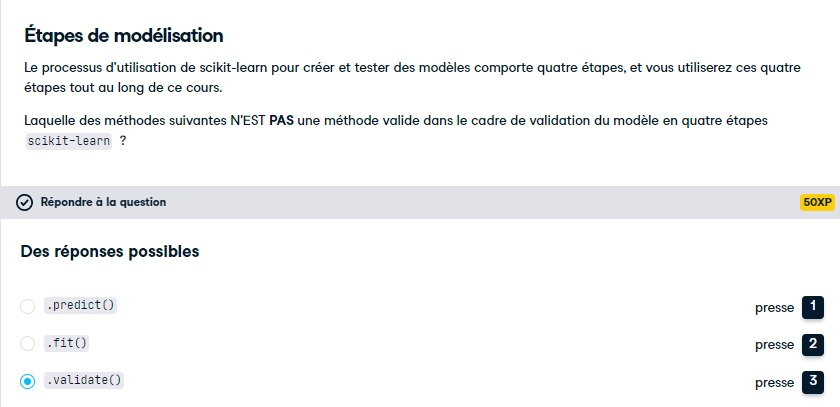

***Correct! La validation est une technique à part entière et ne se complète pas avec `.validate()`. Vous devez apprendre quelques outils et techniques avant de pouvoir valider un modèle.***

####**Données visibles vs. invisibles**
+ ***Les modèles ont tendance à avoir une plus grande précision sur les observations qu'ils ont vues auparavant. Dans l'ensemble de données sur les bonbons, prédire la popularité des Skittles sera probablement plus précis que prédire la popularité des Andes Mints ; Skittles est dans l'ensemble de données, et Andes Mints n'y est pas.***

+ ***Vous avez construit un modèle basé sur 50 bonbons à l'aide de l'ensemble de données X_train et vous devez indiquer la précision du modèle pour prédire la popularité des 50 bonbons sur lesquels le modèle a été construit et des 35 bonbons  (X_test) qu'il n'a jamais vus. Vous utiliserez l'erreur absolue moyenne, `mae()`, comme métrique de précision.***

####**Instructions**

+ En utilisant X_train et X_test comme données d'entrée, créez des tableaux de prédictions à l'aide de `model.predict()`.
+ Calculez la précision du modèle sur les données que le modèle a vues et sur les données que le modèle n'a pas vues auparavant.
+ Utilisez les instructions d'impression pour imprimer les données visibles et invisibles.

In [3]:
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = RandomForestRegressor(n_estimators=50)

In [6]:
# The model is fit using X_train and y_train
model.fit(X_train, y_train)

# Create vectors of predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)

In [7]:
# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

Model error on seen data: 3.29.
Model error on unseen data: 10.58.


***Excellent. Lorsque les modèles fonctionnent différemment sur les données de formation et de test, vous devez vous tourner vers la validation du modèle pour vous assurer que vous disposez du modèle le plus performant. Dans la leçon suivante, vous commencerez à créer des modèles à valider.***

####**1. Modèles de régression**

+ ***Bienvenue dans une autre leçon sur la validation de modèle. Il existe deux types de modèles prédictifs abordés dans ce cours. Modèles construits pour des variables continues, ou modèles de régression, et modèles construits pour des variables catégorielles, appelés modèles de classification. Cette leçon se concentre uniquement sur les modèles de régression, et plus précisément sur les modèles de régression forestière aléatoire utilisant scikit-learn.***

####**2. Forêts aléatoires dans scikit-learn**

+ ***Bien qu'il ne s'agisse pas d'un cours d'apprentissage automatique, il est important de comprendre les principes de base des modèles que nous allons exécuter et discuter. Pour cette raison, nous nous en tiendrons aux modèles forestiers aléatoires tout au long de ce cours et n'exécuterons que des modèles de régression forestière aléatoire ou de classification forestière aléatoire. Les deux modèles ont des paramètres similaires et sont appelés de la même manière lors de l'utilisation de scikit-learn.***

####**3. Arbres de décision**

+ ***Pour comprendre les modèles de forêts aléatoires, nous devons examiner les arbres de décision. Les arbres de décision examinent différentes manières de diviser les données jusqu'à ce qu'il ne reste que quelques observations, voire une seule. Les divisions peuvent être catégoriques, "Êtes-vous gaucher ?", ou en continu, "quel âge avez-vous ?" Une nouvelle observation suivra l'arbre en fonction de ses propres valeurs de données jusqu'à ce qu'elle atteigne un nœud final (appelé une feuille). Dans l'exemple donné, Bob - qui est gaucher, âgé de 18 ans et qui aime les oignons, devrait avoir une dette de 4 000 $ si nous suivons cet arbre de décision. La valeur dans le nœud final représente la moyenne de toutes les personnes dans les données de formation qui se sont terminées dans cette feuille.***

####**4. Faire la moyenne des arbres de décision**

+ ***Les modèles de régression forestière aléatoire génèrent un ensemble d'arbres de décision différents et utilisent la prédiction moyenne des arbres de décision comme valeur finale pour une nouvelle observation. Ici, nous avons créé cinq arbres de décision. Leur prédiction moyenne pour Bob était de 4 200 $ de dettes.***

####**5. Paramètres forestiers aléatoires**

+ ***Bien que ces algorithmes aient beaucoup de paramètres, nous nous concentrerons sur seulement trois. n_estimators est le nombre d'arbres à créer pour la forêt aléatoire. `max_depth est la profondeur maximale de ces arbres, ou combien de fois nous pouvons diviser les données`. Il est également décrit comme la longueur maximale entre le début d'un arbre et les nœuds d'extrémité de l'arbre. Ces deux paramètres seuls peuvent avoir un impact important sur la précision du modèle. Enfin, `random_state nous permet de créer des modèles reproductibles`. J'utiliserai toujours 1 111 comme état aléatoire. Si jamais vous voyez un numéro différent, je vous promets que je n'ai pas codé cet exemple ! Il existe deux manières de définir ces paramètres. Ils peuvent être définis lorsque `RandomForestRegressor()` est lancé, ce qui est la manière la plus courante de définir les paramètres du modèle. Ils peuvent également être définis ultérieurement, en attribuant une nouvelle valeur à un attribut de modèles.***

####**6. Importance des fonctionnalités**

+ ***Après la création d'un modèle, nous pouvons évaluer l'importance des différentes caractéristiques (ou colonnes) des données dans le modèle en utilisant l'attribut `dot-feature_importances_`. Si les données sont un pandas DataFrame, $X$, nous pouvons accéder aux noms de colonne et imprimer le score d'importance assez facilement. Plus ce nombre est grand, plus cette colonne était importante dans le modèle. Dans notre exemple, nous parcourons les valeurs de `dot-feature_importances_` et faisons correspondre le score à la colonne de $X$. La sortie nous indique que `eye_color` n'est pas très utile dans notre modèle, mais le fait que quelqu'un soit gaucher est très important.****

####**7. Commençons**

+ ***Créons un modèle de régression de forêt aléatoire et examinons sa sortie.***


###**EXERCICES**
####**Définir les paramètres et ajuster un modèle**

+ ***Les tâches prédictives appartiennent à l'une des deux catégories suivantes : régression ou classification. Dans l'ensemble de données sur les bonbons, le résultat est une variable continue décrivant la fréquence à laquelle le bonbon a été choisi par rapport à un autre bonbon dans une série de correspondances 1 contre 1. Pour prédire cette valeur (le pourcentage de gain), vous utiliserez un modèle de régression.***

+ *Dans cet exercice, vous allez spécifier quelques paramètres à l'aide d'un modèle de régression de forêt aléatoire rfr.*

####**Instructions**

+ Ajoutez un paramètre à rfr pour que le nombre d'arbres construits soit de 100 et que la profondeur maximale de ces arbres soit de 6.
+ Assurez-vous que le modèle est reproductible en ajoutant un état aléatoire de 1111.
+ Utilisez la méthode .fit() pour former le modèle de régression de forêt aléatoire avec X_train comme données d'entrée et y_train comme réponse.

In [8]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [9]:
# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random state
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=1111)

***Bien joué! Vous avez mis à jour les paramètres _après_ l'initialisation du modèle. Cette approche est utile lorsque vous devez mettre à jour des paramètres. Avant de faire des prédictions, voyons quelles caractéristiques des bonbons étaient les plus importantes pour le modèle.***

####**Importance des fonctionnalités**

+ ***Bien que certains attributs de bonbons, tels que le chocolat, puissent être extrêmement populaires, cela ne signifie pas qu'ils seront importants pour modéliser la prédiction. Une fois qu'un modèle de forêt aléatoire a été ajusté, vous pouvez examiner l'attribut du modèle, `.feature_importances_`, pour voir quelles variables ont eu le plus grand impact. Vous pouvez vérifier l'importance de chaque variable dans le modèle en bouclant sur le tableau d'importance des caractéristiques à l'aide de `enumerate()`.***

+ *Si vous n'êtes pas familier avec la fonction de Python `enumerate()`, il peut parcourir une liste tout en créant un compteur automatique.*

####**Instructions**

+ Parcourez la sortie d'importance des fonctionnalités de rfr.
+ Imprimez les noms de colonne X_train et le score d'importance pour cette colonne.

In [10]:
# Fit the model using X and y
rfr.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.35
fruity: 0.01
caramel: 0.02
peanutyalmondy: 0.22
nougat: 0.03
crispedricewafer: 0.04
hard: 0.01
bar: 0.05
pluribus: 0.02
sugarpercent: 0.11
pricepercent: 0.14


***Bien joué. Pas de surprise ici - le chocolat _est_ la variable la plus importante. `.feature_importances_` est un excellent moyen de voir quelles variables étaient importantes pour votre modèle de forêt aléatoire.***

####**1. Modèles de classement**

+ ***Bienvenue à nouveau - Dans cette leçon, nous passons des modèles de régression aux modèles de classification.***

####**2. Modèles de classement**

+ ***Cette leçon se concentre sur l'examen des modèles de classification, ou des modèles créés lorsque la variable de réponse est catégorielle. Prédire la couleur des cheveux d'un nouveau-né, le vainqueur d'un match de basket ou le genre de la prochaine chanson à venir sur la station de radio sont autant d'exemples de réponses catégoriques - et nous pouvons construire un modèle de classification pour chacun d'eux.***

####**3. L'ensemble de données Tic-Tac-Toe**

+ ***Lors de l'examen des modèles de classification au cours de ce cours, nous utiliserons principalement l'ensemble de données de fin de partie Tic-Tac-Toe. Ce jeu de données contient l'ensemble des configurations possibles à la fin d'une partie de Tic-Tac-Toe. Chacune des neuf premières colonnes représente l'une des neuf cases d'un plateau Tic-Tac-Toe. Un $"b"$ signifie que la case est vide, un $"X"$ représente le joueur un et un "O" est pour le joueur deux. La dernière colonne indique si le premier joueur a gagné (étiqueté positif) ou non (étiqueté négatif).***

####**4. Pourquoi cet ensemble de données***

+ ***L'ensemble de données tic_tac_toe est idéal pour la validation du modèle car nous avons l'ensemble complet des résultats. Nous pouvons inclure autant ou aussi peu de ces données dans nos modèles que nous le souhaitons. Cela nous permet de vraiment tester les performances du modèle sur des données invisibles. Et si vous venez d'avoir une envie de jouer au Tic-Tac-Toe, Google jouera contre vous aussi longtemps que vous le souhaitez !***

####**5. Utilisation de .predict() pour la classification**

+ ***Plusieurs méthodes sont partagées par tous les modèles scikit-learn, mais certaines sont propres à un type de modèle spécifique. Auparavant, nous utilisions la méthode `dot-predict()` pour prédire la valeur des nouvelles observations. Le classificateur de scikit-learn, `RandomForestClassifier()` a également la méthode `dot-predict()`. Cette fois, la nouvelle classe des observations est retournée. Nous pouvons également voir combien d'observations ont été attribuées à chaque classe en transformant le tableau de prédictions en une série de pandas, puis en utilisant la méthode `dot-value_counts()`.***

####**6. Prédire les probabilités**

+ ***Une autre méthode de prédiction est `dot-predict_proba()`, qui renvoie un tableau de probabilités prédites pour chaque classe. Parfois, dans la validation du modèle, nous voulons connaître les valeurs de probabilité et pas seulement la classification. Chaque entrée du tableau contient des probabilités qui totalisent 1. Par exemple, la deuxième entrée a des valeurs de point-1 et point-9. Cela indique que pour ce point de données, le joueur un a 10 % de chances de perdre compte tenu du plateau de jeu actuel et 90 % de chances de gagner.***

####**7. Méthodes suite**

+ ***Enfin, nous introduisons deux méthodes supplémentaires. La première méthode, `dot-get_params()` est utilisée pour examiner quels paramètres sont entrés dans un modèle scikit-learn. Il imprimera un dictionnaire des paramètres et de leurs valeurs, nous permettant de voir exactement quels paramètres ont été utilisés. La connaissance de ces paramètres est essentielle lors de l'évaluation de la qualité du modèle, de la réexécution des modèles et même du réglage des paramètres. La dernière méthode que nous allons introduire est `dot-score()`. C'est un moyen rapide d'examiner la précision globale du modèle de classification. Les mesures de précision seront discutées plus en détail dans le chapitre deux, mais fondamentalement, cette méthode fournit des valeurs de 0 à 1 sur le pourcentage d'observations qui ont été correctement étiquetées. Dans cet exemple, près de 90 % des jeux ont été correctement prédits par notre modèle.***

####**8. Classons les scénarios de fin de jeu Tic-Tac-Toe**

+ ***Maintenant que nous avons eu une introduction aux modèles de classification aléatoire des forêts, faisons quelques exercices.***


####**Prédictions de classification**
+ ***Lors de la validation d'un modèle, il est souvent important d'en savoir plus sur les prédictions que la seule classification finale. Lorsqu'ils prédisent qui gagnera un match, la plupart des gens s'intéressent également à la probabilité qu'une équipe gagne.***


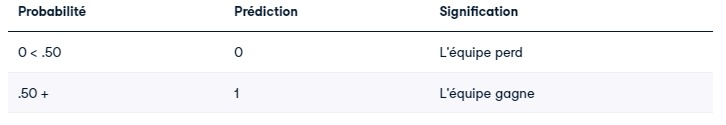


+ ***Dans cet exercice, vous examinez les méthodes `.predict() et .predict_proba()` utilisez l'ensemble de données tic_tac_toe. La première méthode donnera une prédiction de savoir si le joueur un gagnera le jeu, et la seconde méthode fournira la probabilité que le joueur un gagne. Utiliser rfc comme modèle de classification aléatoire des forêts.***

####**Instructions**

+ Créez deux tableaux de prédictions.
+ Un pour les valeurs de classification et un pour les probabilités prédites.
+ Utilisez la méthode .value_counts() pour une série de pandas pour imprimer le nombre d'observations qui ont été attribuées à chaque classe.
+ Imprimez la première observation de probability_predictions pour voir comment les probabilités sont structurées.

In [11]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [12]:
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)
X = tic_tac_toe.drop('Class', axis=1)
X = pd.get_dummies(X)

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
rfc = RandomForestClassifier()

In [14]:
# Fit the rfc model.
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

1    520
0    247
dtype: int64


In [15]:
# Print the first value from probability_predictions
print('The first predicted probabilities are: {}'.format(probability_predictions[0]))

The first predicted probabilities are: [0.16 0.84]


***Bien joué! Vous pouvez voir qu'il y avait 563 observations où le joueur 1 était censé gagner le jeu Tic-Tac-Toe. Notez également que le tableau predicted_probabilities contient des listes avec seulement deux valeurs car vous n'avez que deux réponses possibles (gagner ou perdre). Retenez ces deux méthodes, car vous les utiliserez beaucoup tout au long de ce cours.***


####**Réutilisation des paramètres du modèle**
+ ***La réplication des performances du modèle est essentielle dans la validation du modèle. La réplication est également importante lors du partage de modèles avec des collègues, de la réutilisation de modèles sur de nouvelles données ou de la pose de questions sur un site Web tel que [Stack Overflow](https://stackoverflow.com/). Vous pouvez utiliser un tel site pour interroger d'autres codeurs sur les erreurs de modèle, la sortie ou les performances. La meilleure façon d'y parvenir est de répliquer votre travail en réutilisant les paramètres du modèle.***

+ *Dans cet exercice, vous utiliserez différentes méthodes pour rappeler les paramètres qui ont été utilisés dans un modèle.*

####**Instructions**

+ Imprimez les caractéristiques du modèle rfc en imprimant simplement le modèle.
+ Imprimez uniquement l'état aléatoire du modèle.
+ Imprimez le dictionnaire des paramètres du modèle.

In [16]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Print the classification model
print(rfc)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)


In [17]:
# Print the classification model's random state parameter
print('The random state is: {}'.format(rfc.random_state))

The random state is: 1111


In [18]:
# Print all parameters
print('Printing the parameters dictionary: {}'.format(rfc.get_params()))

Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


***Bien joué! Se rappeler quels paramètres ont été utilisés sera utile à l'avenir. La validation et les performances du modèle dépendent fortement des paramètres utilisés, et il n'y a aucun moyen de répliquer un modèle sans garder une trace des paramètres utilisés !***


####**Classificateur de forêt aléatoire**
+ ***Cet exercice passe en revue les quatre étapes de modélisation abordées tout au long de ce chapitre à l'aide d'un modèle de classification aléatoire des forêts. Vous serez:***

  + Créez un modèle de classification de forêt aléatoire.
  + Ajustez le modèle à l'aide du jeu de données tic_tac_toe.
  + Faites des prédictions pour savoir si le joueur un gagnera (1) ou perdra (0) la partie en cours.
  + Enfin, vous évaluerez la précision globale du modèle.
  + Commençons!

####**Consignes**

+ Créez rfc en utilisant l'implémentation scikit-learn de classificateurs de forêts aléatoires et définissez un état aléatoire de 1111.
+ Ajuster rfc en utilisant X_train pour les données d'entraînement et y_train pour les réponses.
+ Prédisez les valeurs de classe pour X_test.
+ Utilisez la méthode .score() pour imprimer une métrique de précision pour X_test les valeurs réelles données y_test.

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)

In [20]:
# Create predictions on X_test
predictions = rfc.predict(X_test)
print(predictions[0:5])

[1 0 1 1 0]


In [21]:
# Print model accuracy using score() and the testing data
print(rfc.score(X_test, y_test))

0.7992177314211213


+ ***C'est toutes les étapes! Notez que les cinq premières prédictions étaient toutes de 1, ce qui indique que le joueur 1 devrait gagner ces cinq matchs. Vous voyez également que la précision du modèle n'était que de 82 %.***

+ ***Passons au chapitre 2 et augmentons notre boîte à outils de validation de modèle en apprenant à diviser les ensembles de données, les mesures de précision standard et le compromis biais-variance.***

####**1. Création d'ensembles de données d'entraînement, de test et de validation**

+ ***Bonjour à tous - Commençons par créer des ensembles de données d'entraînement, de test et de validation.***

####**2. Séparation train/test traditionnelle**

+ ***Dans les premières leçons, nous avons appelé les données des données « visibles » si elles étaient utilisées pour l'ajustement du modèle, tandis que les données « invisibles » décrivaient les données sur lesquelles nous n'avions pas formé notre modèle. Dans la validation du modèle, nous utilisons des échantillons non retenus pour reproduire cette idée. Nous définissons un jeu de données d'exclusion comme toute donnée qui n'est pas utilisée pour la formation et qui sert uniquement à évaluer les performances du modèle. Les données disponibles sont divisées en deux jeux de données. Un utilisé pour la formation et un autre qui est tout simplement hors limites pendant que nous formons nos modèles, appelé ensemble de données de test (ou d'exclusion). Cette étape est essentielle à la validation du modèle et constitue la première étape que vous pouvez effectuer pour garantir les performances de votre modèle.***

###**3. Définitions et ratios des ensembles de données**

+ ***Nous utilisons l'échantillon retenu comme ensemble de données de test afin que nous puissions avoir une estimation impartiale des performances de notre modèle une fois la formation terminée. Généralement, une bonne règle empirique consiste à utiliser une répartition 80:20. Cela équivaut à mettre de côté vingt pour cent des données pour l'ensemble de test et à utiliser le reste pour la formation. Vous pouvez choisir d'utiliser plus de données d'apprentissage lorsque les données globales sont limitées, ou moins de données d'apprentissage si la méthode de modélisation est coûteuse en calculs.***

####**4. Les jeux de données $X$ et $y$**

+ ***Avant d'utiliser la fonction de création holdout de scikit-learn train_test_split(), nous allons utiliser le jeu de données tic_tac_toe et créer un jeu de données $X$ avec les données prédictives, et un jeu de données ay avec uniquement les réponses. Les neuf premières colonnes de tic_tac_toe peuvent être utilisées pour l'entraînement, tandis que la 10e colonne contient les valeurs de réponse. En passant, les modèles de classification pour les valeurs catégorielles, telles que celles trouvées dans l'ensemble de données tic_tac_toe, nécessitent des variables factices. Si vous n'êtes pas familier avec les variables fictives, consultez les autres cours de DataCamp qui entrent plus en détail ici.**

####**5. Création d'échantillons restants**

+ ***La fonction `train_test_split()` est simple. Nous avons divisé les ensembles de données $X$ et $y$, à la fois en un train et un ensemble de données de test. Cette fonction a quelques paramètres que nous allons utiliser. `test_size` prend soit un flottant soit un entier et spécifie la taille de l'ensemble de test. Si `test_size` est vide, vous pouvez utiliser à la place `train_size` pour définir la taille de l'ensemble d'apprentissage. Et enfin, random_state permet de définir la graine du modèle et aide à maintenir la reproductibilité.***

####**6. Ensemble de données pour les tests préliminaires ?**

+ ***Nous savons que l'ensemble de test est hors limites jusqu'à ce que nous ayons complètement terminé la formation, mais que faisons-nous lorsque nous testons les paramètres du modèle ? Par exemple, si nous exécutons un modèle de forêt aléatoire avec 100 arbres et un autre avec 1 000 arbres, quel jeu de données utilisons-nous pour tester ces résultats ?***

####**7. Échantillons retenus pour le réglage des paramètres**

+ ***Lors du test des paramètres, du réglage des hyper-paramètres ou chaque fois que nous évaluons fréquemment les performances du modèle, nous devons créer un deuxième échantillon non retenu, appelé jeu de données de validation. Pour cet ensemble de données, les données disponibles sont l'ensemble de données d'apprentissage d'origine, qui est ensuite divisé de la même manière que celle utilisée pour diviser l'ensemble de données complet d'origine. Nous utilisons l'échantillon de validation pour évaluer les performances de notre modèle lors de l'utilisation de différentes valeurs de paramètres.***

####**8. Former, valider, tester suite**

+ ***Pour créer à la fois les échantillons restants, les jeux de données de test et de validation, nous utilisons deux fois la fonction train_test_split() de scikit-learn. Le premier appel créera des ensembles de données d'entraînement et de test comme d'habitude. Lors du deuxième appel, nous avons divisé cet ensemble de données d'entraînement temporaire en ensembles de données d'entraînement et de validation finaux. Dans cet exemple, nous avons d'abord utilisé une répartition 80/20 pour créer le jeu de test. Avec l'ensemble de données d'entraînement à 80 %, nous avons utilisé une répartition 75/25 pour créer un ensemble de données de validation. Nous laissant 60 % des données pour la formation, 20 % pour la validation et 20 % pour les tests.***

####**9. C'est le temps d'attente**

+ ***Entraînons-nous à créer des ensembles de retenue à utiliser dans nos modèles.***

###**EXERCICES**

####**Créer un ensemble d'exclusions**
Votre patron vous a demandé de créer un modèle de forêt aléatoire + ***simple sur l'ensemble de données tic_tac_toe. Elle ne veut pas que vous passiez beaucoup de temps à sélectionner des paramètres ; elle veut plutôt savoir dans quelle mesure le modèle fonctionnera sur les données futures. Pour les futurs jeux Tic-Tac-Toe, il serait bon de savoir si votre modèle peut prédire quel joueur va gagner.***

+ ***L'ensemble de données tic_tac_toe a été chargé pour votre usage.***

+ *Notez qu'en Python, =\indique que le code était trop long pour une ligne et a été divisé en deux lignes.*

####**Instructions**

+ Créez le jeu de données $X$ en créant des variables factices pour toutes les colonnes catégorielles.
+ Diviser $X$ et $y$ former ( X_train, y_train) et tester ( X_test, y_test) les jeux de données.
+ Fractionner les ensembles de données en utilisant 10 % pour les tests

In [22]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets. Use 10% for the test set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=1111)

***Bien! N'oubliez pas que sans l'ensemble d'exclusion, vous ne pouvez pas vraiment valider un modèle. Passons à la création de deux ensembles d'exclusion.***

####**Créer deux ensembles d'exclusion**

+ ***Vous avez récemment créé un modèle de forêt aléatoire simple pour prédire les gains du jeu Tic-Tac-Toe pour votre patron, et à sa demande, vous n'avez fait aucun réglage de paramètre. Malheureusement, la précision globale du modèle était trop faible pour ses normes. Cette fois-ci, elle vous a demandé de vous concentrer sur la performance du modèle.***

+ ***Avant de commencer à tester différents modèles et ensembles de paramètres, vous devrez diviser les données en ensembles de données d'entraînement, de validation et de test. N'oubliez pas qu'après avoir divisé les données en ensembles de données d'apprentissage et de test, l'ensemble de données de validation est créé en divisant l'ensemble de données d'apprentissage.***

+ *Les ensembles de données $X$ et $y$ ont été chargés pour votre usage.*

####**Instructions**

+ Créez des ensembles de données temporaires et des ensembles de données de test (X_test, y_test).
+ Utilisez 20 % des données globales pour les ensembles de données de test.
+ À l'aide des ensembles de données temporaires (X_temp, y_temp), créez des ensembles de données d'entraînement (X_train, y_train) et de validation (X_val, y_val).
+ Utilisez 25 % des données temporaires pour les jeux de données de validation.

In [23]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.20, random_state=1111)

# Create the final training and validation datasets
X_train, X_val,y_train, y_val =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

***Super! Vous disposez maintenant d'ensembles de données d'entraînement, de validation et de test, mais savez-vous _quand_ vous avez besoin à la fois d'ensembles de données de validation et de test ? Continuer! Le prochain exercice vous aidera à vous assurer que vous comprenez quand utiliser les ensembles de données de validation.***

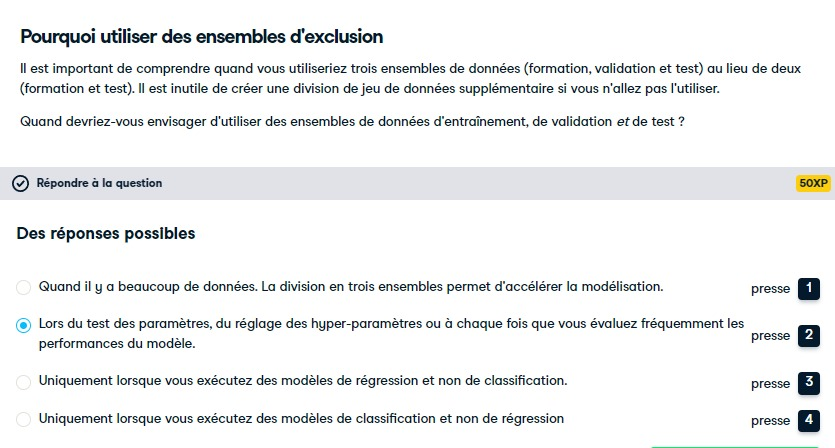

***Correct! Chaque fois que nous évaluons les performances du modèle à plusieurs reprises, nous devons créer des ensembles de données de formation, de validation et de test.***

####**1. Métriques de précision : modèles de régression**

+ ***Maintenant que nous en savons plus sur les échantillons restants, discutons des mesures de précision utilisées lors de la validation des modèles, en commençant par les modèles de régression.***

####**2. Modèles de régression**

+ ***N'oubliez pas que les modèles de régression sont construits pour des variables continues. Il peut s'agir de prédire le nombre de points qu'un joueur marquera demain ou le nombre de chiots qu'un chien est sur le point d'avoir !***

####**3. Erreur absolue moyenne (MAE)**

+ ***Pour évaluer les performances d'un modèle de régression, nous pouvons utiliser l'erreur absolue moyenne. C'est la mesure d'erreur la plus simple et la plus intuitive et c'est la différence absolue moyenne entre les prédictions ($y_i$) et les valeurs réelles ($\hat{y_i})$. Si votre chien avait six chiots, mais que vous n'en aviez prédit que quatre, la différence absolue serait de deux. Cette métrique traite tous les points de la même manière et n'est pas sensible aux valeurs aberrantes. Lorsqu'il s'agit d'applications où nous ne voulons pas que les erreurs importantes aient un impact majeur, l'erreur absolue moyenne peut être utilisée. Un exemple pourrait être de prédire la facture d'essence mensuelle de votre voiture, lorsqu'une valeur aberrante peut avoir été causée par un voyage en voiture ponctuel.***

####**4. Erreur quadratique moyenne (MSE)**

+ ***Vient ensuite l'erreur quadratique moyenne (MSE). Il s'agit de la mesure d'erreur de régression la plus largement utilisée pour les modèles de régression. Elle est calculée de la même manière que l'erreur absolue moyenne, mais cette fois nous mettons au carré le terme de différence. Le MSE permet à des erreurs plus importantes d'avoir un impact plus important sur le modèle. En utilisant l'exemple de voiture précédent, si vous saviez qu'une fois par an vous pourriez faire un voyage en voiture, vous pourriez vous attendre à avoir occasionnellement une erreur importante et voudriez que votre modèle reprenne lors de ces voyages.***

####**5. MAE contre MSE**

+ ***Choisir entre le MAE et le MSE revient à l'application. Ces résultats sont cependant dans des unités différentes et ne doivent pas être directement comparés !***

####**6. Erreur absolue moyenne**

+ ***Pour pratiquer ces métriques, utilisons l'ensemble de données ultime sur les bonbons d'Halloween. Ici, nous prédisons le pourcentage de victoires des bonbons lors de confrontations directes avec d'autres bonbons. Supposons que nous ayons déjà ajusté un modèle de forêt aléatoire et calculé des prédictions pour l'ensemble de données de test. Pour l'erreur absolue moyenne, nous pouvons calculer cela de deux manières. Un calcul manuel, qui prend la somme des différences absolues et divise par le nombre total d'observations, ou nous pouvons utiliser la fonction `mean_absolute_error() de scikit-learn`. Nous fournissons un tableau des valeurs réelles, suivi d'un tableau des prédictions. Les deux méthodes produisent une valeur unique de 9-point-99 en sortie. Nous couvrons les calculs manuels de ces fonctions pour comprendre les résultats de ces métriques d'erreur. Notez que nous examinons la précision des données de test. Cette erreur signifie que nous sommes à environ 10 points de pourcentage en moyenne lors de la prédiction du pourcentage de victoire. Comme les pourcentages de victoire varient de 0 à 1, c'est assez bon.***

####**7. Erreur quadratique moyenne**

+ ***Pour l'erreur quadratique moyenne, nous pouvons la calculer manuellement ou avec la fonction `mean_squared_error()`. Les deux méthodes produisent une valeur de 141-point-4. Dans cet exemple, l'erreur quadratique moyenne est une mesure de précision plus appropriée, car nous voulons que les valeurs aberrantes aient plus d'impact sur les performances du modèle. Par exemple, si une barre de chocolat est vraiment sous-performante, il peut y avoir des attributs de cette barre de chocolat qui comptent vraiment, à part le fait qu'il s'agisse de chocolat.***

####**8. Précision pour un sous-ensemble de données**

+ ***Parfois, nous souhaitons connaître la précision d'un modèle pour un sous-ensemble spécifique, par exemple les performances de ce modèle uniquement sur les bonbons au chocolat. Si la colonne 1 de notre ensemble de test contient des 1 pour les bonbons contenant du chocolat et 0 ; sinon, nous filtrons le tableau de test en fonction de ces valeurs et exécutons les métriques de précision. Étant donné que les bonbons au chocolat avaient des erreurs inférieures à 9 et que les bonbons sans chocolat avaient des erreurs de 11, le modèle fonctionnait mieux sur les bonbons au chocolat.***

####**9. Pratiquons**

+ ***Examinons quelques exemples sur les métriques de précision de la régression.***

###**EXERCICES**

####**Erreur absolue moyenne**
+ ***La communication des résultats de la modélisation peut être difficile. Cependant, la plupart des clients comprennent qu'en moyenne, un modèle prédictif était erroné d'un certain nombre. Cela facilite l'explication de l'erreur absolue moyenne. Par exemple, lorsque vous prédisez le nombre de victoires pour une équipe de basket-ball, si vous prédisez 42 et qu'ils finissent par 40, vous pouvez facilement expliquer que l'erreur était de deux victoires.***

+ *Dans cet exercice, vous passez un entretien pour un nouveau poste et vous disposez de deux tableaux. y_test, le nombre réel de victoires pour les 30 équipes de la NBA en 2017 et predictions, qui contient une prédiction pour chaque équipe. Pour tester votre compréhension, il vous est demandé à la fois de calculer manuellement le MAE et d'utiliser sklearn.*

####**Instructions**

+ Calculez manuellement le MAE en utilisant $n$ le nombre d'observations prévues.
+ Calculez le MAE à l'aide de sklearn.
+ Imprimez les deux valeurs de précision à l'aide des instructions d'impression.

In [24]:
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

In [25]:
from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

With a manual calculation, the error is 5.9


In [26]:
# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

Using scikit-learn, the error is 5.9


***Bien joué! Ces prédictions étaient d'environ six victoires en moyenne. Ce n'est pas trop mal étant donné que les équipes de la NBA jouent 82 matchs par an. Voyons à quoi ressembleraient ces erreurs si vous utilisiez plutôt l'erreur quadratique moyenne.***

####**Erreur quadratique moyenne**
+ ***Concentrons-nous à nouveau sur les prédictions de la NBA 2017. Chaque année, il y a au moins deux équipes de la NBA qui gagnent bien plus de matchs que prévu. Si vous utilisez le MAE, cette métrique de précision ne reflète pas autant les mauvaises prédictions que si vous utilisez le MSE. La quadrature des grandes erreurs de mauvaises prédictions rendra la précision moins bonne.***

+ *Dans cet exemple, les dirigeants de la NBA veulent mieux prédire les victoires des équipes. Vous utiliserez l'erreur quadratique moyenne pour calculer l'erreur de prédiction. Les gains réels sont chargés au fur et à mesure y_test et les pronostics au fur et à mesure predictions.*

####**Instructions**

+ Calculer manuellement le MSE.
  $$MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i ) ^2 }{n}$$

+ Calculez le MSE à l'aide de sklearn.

In [27]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

With a manual calculation, the error is 49.1


In [28]:
# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

Using scikit-learn, the error is 49.1


***Bon travail! Si vous exécutez des modèles supplémentaires, vous essaierez de battre un MSE de 49,1, qui est l'erreur quadratique moyenne de l'utilisation de votre modèle. Bien que la MSE ne soit pas aussi interprétable que la MAE, elle nous aidera à sélectionner un modèle comportant moins d'erreurs « importantes ».***

####**Performances sur des sous-ensembles de données**

+ ***Dans le basket professionnel, il existe deux conférences, l'Est et l'Ouest. Les entraîneurs et les fans ne se soucient souvent que de la façon dont les équipes de leur propre conférence s'en sortiront cette année.***

+ *Vous avez travaillé sur un modèle de prédiction de la NBA et souhaitez déterminer si les prédictions étaient meilleures pour la conférence Est ou Ouest. Vous avez ajouté un troisième tableau à vos données appelé labels, qui contient un "E" pour les équipes Est et un "W" pour l'Ouest. y_test et predictions ont de nouveau été chargés pour votre usage.*

####**Consignes**

+ Créez un tableau east_teams qui peut être utilisé pour filtrer labelsles équipes de la conférence Est.
+ Créez les tableaux true_east et preds_east en filtrant les tableaux y_test et predictions.
+ Utilisez les relevés d'impression pour imprimer le MAE (en utilisant scikit-learn) pour la conférence Est. La fonction mean_absolute_error a été chargée en tant que mae.
+ La variable west_errorcontient le MAE pour les équipes de l'Ouest. Utilisez la déclaration d'impression pour imprimer le MAE de la conférence Ouest.

In [29]:
labels= np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

In [30]:
# Find the East conference teams
east_teams = labels == 'E'

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

west_teams = labels == 'W'
true_west = y_test[west_teams]
preds_west = predictions[west_teams]

In [31]:
# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

The MAE for East teams is 6.733333333333333


In [32]:
# Print the west accuracy
print('The MAE for West teams is {}'.format(mae(true_west, preds_west)))

The MAE for West teams is 5.066666666666666


***Super! Il semble que les prédictions de la conférence de l'Ouest étaient d'environ deux matchs meilleures en moyenne. Au cours des dernières saisons, les équipes de l'Ouest ont généralement remporté le même nombre de matchs que les experts l'ont prédit. Les équipes de l'Est ne sont tout simplement pas aussi prévisibles que celles de l'Ouest.***

####**1. Métriques de classification**

+ ***Content de te revoir! Nous comprenons déjà les modèles de classification ; regardons maintenant leurs mesures de précision.***

####**2. Métriques de classification**

+ ***Les mesures de précision de la classification sont assez différentes de celles de la régression. Rappelez-vous, avec des modèles de classification ; nous prédisons à quelle catégorie appartient une observation. De nombreuses mesures de précision sont disponibles. Il y a la précision, le rappel, l'exactitude, la spécificité, le score F1, des formes alternatives du score F1 et plusieurs autres.***

####**3. Métriques de classification**

+ ***Nous nous concentrerons sur la précision, le rappel et l'exactitude. Comme chacun d'eux est facile à comprendre et a des applications très pratiques. Une façon de calculer ces métriques consiste à utiliser les valeurs de la matrice de confusion.**

####**4. Matrice de confusion**

+ ***Lorsque vous faites des prédictions, surtout s'il y a un résultat binaire, cette matrice est l'un des premiers résultats que vous devriez examiner. Lorsque nous avons un résultat binaire, la matrice de confusion est une matrice 2x2 qui montre comment vos prédictions se sont adaptées aux deux résultats. Par exemple, pour les prédictions de 0 qui étaient en fait 0 (ou de vrais négatifs), nous examinons le carré 0, 0 de la matrice. Toutes les mesures de précision de la diapositive précédente peuvent être calculées à l'aide des valeurs de cette matrice, et c'est un excellent moyen de visualiser les premiers résultats de votre modèle de classification.***

####**5. Créer une matrice de confusion avec scikit-learn**

+ ***Nous pouvons créer une matrice de confusion en utilisant `la fonction confusion_matrix() de scikit-learn`. Lorsqu'il s'agit de données binaires, cela imprimera un tableau 2x2 qui représente la matrice de confusion. Dans cette matrice, l'index de ligne représente la véritable catégorie et l'index de colonne représente la catégorie prédite. Par conséquent, l'entrée 1, 0 du tableau représente le nombre de vrais 1 qui ont été prédits comme étant 0 ou 8 dans cet exemple.***

####**6. Précision***

+ ***La précision est la mesure la plus facile à comprendre et représente la capacité globale de votre modèle à prédire correctement la classification correcte. En utilisant la matrice de confusion, nous ajoutons les valeurs qui ont été prédites 0 et qui sont en fait 0 (qui sont appelées vrais négatifs), aux valeurs prédites comme étant 1 qui sont 1 (appelées vrais positifs), puis divisons par le nombre total d'observations . Dans ce cas, notre précision était de 85 %. Dans cet exemple, vous pouvez associer un vrai positif comme des 1 prédits qui sont aussi en réalité des 1. Cependant, si vos catégories étaient des gains ou des pertes, vous pourriez associer un vrai positif au nombre de gains prévus qui étaient en fait des gains.***

####**7. Précision**

+ ***Vient ensuite la précision ou le nombre de vrais positifs sur toutes les valeurs positives prédites. Nous avons correctement prédit 62 valeurs vraies mais également prédit 7 faux positifs. Par conséquent, la précision est de 62 divisé par 69. La précision est utilisée lorsque nous ne voulons pas surestimer les valeurs positives. S'il en coûte 2 000 $ pour faire venir de nouveaux employés potentiels par avion, une entreprise peut n'avoir des entretiens sur le campus qu'avec des personnes qui, selon elle, vont vraiment rejoindre leur entreprise. Dans les données de l'exemple, près de 9 1 sur 10 prédits auraient rejoint l'entreprise.***

####**8. Rappel**

+ ***La métrique de rappel consiste à trouver toutes les valeurs positives. Ici, nous avons correctement prédit 62 vrais positifs et eu 8 faux négatifs. Notre rappel est de 62 sur 70. Le rappel est utilisé lorsque nous ne pouvons pas nous permettre de manquer des valeurs positives. Par exemple, même si un patient a un faible risque d'avoir un cancer, nous pouvons vouloir lui faire passer des tests supplémentaires. Le coût de manquer un patient atteint de cancer est bien plus élevé que le coût des dépistages supplémentaires pour ce patient.**

####**9. Exactitude, précision, rappel**

+ ***L'exactitude, la précision et le rappel sont appelés de la même manière. Utilisez la fonction métrique de précision souhaitée et fournissez les valeurs réelles et prédites. Une seule valeur sera produite en conséquence. Dans cet exemple, nous avons obtenu les mêmes valeurs que celles que nous avons calculées à l'aide de la matrice de confusion.***

####**10. Temps de pratique**

+ ***Examinons quelques exemples à l'aide de ces mesures de précision.***

###**EXERCICES**

####**Matrices de confusion**
+ ***Les matrices de confusion sont un excellent moyen de commencer à explorer la précision de votre modèle. Ils fournissent les valeurs nécessaires pour calculer un large éventail de paramètres, y compris la sensibilité, la spécificité et le score F1.***

+ *Vous avez construit un modèle de classification pour prédire si une personne a un bras cassé sur la base d'une image radiographique. Sur l'ensemble de test, vous avez la matrice de confusion suivante :*

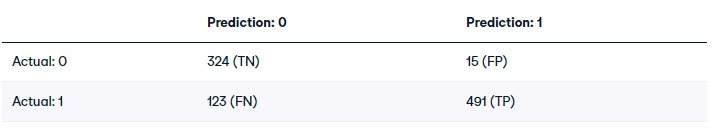


####**Instructions**

+ Utilisez la matrice de confusion pour calculer la précision globale.
+ Utilisez la matrice de confusion pour calculer la précision et le rappel.
+ Utilisez les trois instructions d'impression pour imprimer chaque valeur de précision.

In [33]:
# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

The overall accuracy is  0.86


In [34]:
# Calculate and print the precision
precision = (491) / (15 + 491)
print("The precision is {0: 0.2f}".format(precision))

The precision is  0.97


In [35]:
# Calculate and print the recall
recall = (491) / (123 + 491)
print("The recall is {0: 0.2f}".format(recall))

The recall is  0.80


***Bien joué! Dans ce cas, un vrai positif est une image d'un bras cassé réel qui a également été prévu pour être cassé. Les médecins sont d'accord avec quelques faux positifs supplémentaires (prévus cassés, pas réellement cassés), tant que vous ne manquez personne qui a besoin de soins médicaux immédiats.***

####**Matrices de confusion, encore**
+ ***Créer une matrice de confusion en Python est simple. Le plus grand défi sera de s'assurer que vous comprenez l'orientation de la matrice. Cet exercice vous permet de comprendre l' sklearnimplémentation des matrices de confusion. Ici, vous avez créé un modèle de forêt aléatoire en utilisant l'ensemble de données tic_tac_toe rfc pour prédire les résultats de 0 (perte) ou 1 (une victoire) pour le joueur un.***

+ *Remarque : Si vous lisez des informations sur les matrices de confusion sur un autre site Web ou pour un autre langage de programmation, les valeurs peuvent être inversées.*

####**Instructions**

+ sklearn Fonction d' importation pour créer des matrices de confusion.
+ À l'aide du modèle rfc, créez des prédictions de catégorie sur l'ensemble de test X_test.
+ Créez une matrice de confusion à l'aide de sklearn.
+ Imprimez la valeur à partir de cmlaquelle représente les 1 réels qui ont été prédits comme 1 (vrais positifs).



In [36]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [37]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

In [38]:
# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1111)

In [40]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

[[28  2]
 [ 0 66]]


In [41]:
# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1,1]))

The number of true positives is: 66


***Bon travail! La ligne 1, colonne 1 représente le nombre de 1 réels qui étaient des 1 prédits (les vrais positifs). Assurez-vous toujours de comprendre l'orientation de la matrice de confusion avant de commencer à l'utiliser !***


####**Précision contre rappel**
+ ***Les mesures de précision que vous utilisez pour évaluer votre modèle doivent toujours être basées sur l'application spécifique. Pour cet exemple, supposons que vous êtes un très mauvais perdant lorsqu'il s'agit de jouer au morpion, mais seulement lorsque vous êtes certain de gagner.***

+ ***Choisissez la mesure de précision la plus appropriée, soit la précision, soit le rappel, pour compléter cet exemple. Mais rappelez-vous, si vous pensez que vous allez gagner, vous feriez mieux de gagner !***

+ *Utilisez rfc, qui est un modèle de classification de forêt aléatoire construit sur le jeu de données tic_tac_toe.*

####**Instructions**
+ Importez la métrique de précision ou de rappel pour sklearn. Une seule méthode est correcte pour le contexte donné.
+ Calculez la précision ou le rappel en utilisant y_testpour les vraies valeurs et test_predictions pour les prédictions.
+ Imprimez le score final en fonction de la métrique sélectionnée.

In [42]:
from sklearn.metrics import precision_score

test_predictions = rfc.predict(X_test)

# Create precision or recall score based on the metric you imported
score = precision_score(y_test, test_predictions)

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 0.97


***Bon travail! La précision est la bonne métrique ici. Les mauvais perdants ne supportent pas de perdre quand ils sont certains de gagner ! Pour cette raison, notre modèle doit être aussi précis que possible. Avec une précision de seulement 79%, vous devrez peut-être essayer d'autres techniques de modélisation pour améliorer ce score.***

####**1. Le compromis biais-variance**

+ ***Rebonjour. Essayons d'identifier quand nous avons un bon modèle d'ajustement.***

####**2. Écart**

+ ***Une façon de le faire est de considérer le biais et la variance. La variance se produit lorsqu'un modèle accorde trop d'attention aux données d'apprentissage et ne parvient pas à généraliser aux données de test. Ces modèles fonctionnent bien uniquement sur les données d'entraînement, mais pas sur les données de test, et sont considérés comme surajustés.***

####**3. Modèles de surajustement (forte variance)**

+ ***Le surajustement se produit lorsque notre modèle commence à donner un sens au bruit dans les données d'apprentissage. Dans ce graphique, vous pouvez voir la forme quadratique naturelle des points orange. Cependant, notre ligne de prédiction bleue épouse les données et ne s'étendrait probablement pas bien aux nouveaux points orange. Le surajustement est cependant facile à identifier, car l'erreur d'entraînement sera bien inférieure à l'erreur de test.***

####**4. Biais**

+ ***Le deuxième terme, Biais, se produit lorsque le modèle ne parvient pas à trouver les relations entre les données et la valeur de réponse. Le biais entraîne des erreurs élevées sur les ensembles de données de formation et de test et est associé à un modèle sous-ajusté.***

####**5. Modèles sous-ajustés (biais élevé)**

+ ***Le sous-ajustement se produit lorsque le modèle n'a pas pu trouver les modèles sous-jacents disponibles dans les données. Cela peut arriver si nous n'avons pas assez d'arbres ou si les arbres ne sont pas assez profonds. Dans cet exemple, nous avons la moyenne des valeurs réelles agissant comme notre prédiction. Le sous-ajustement est plus difficile à identifier car les erreurs d'entraînement et de test seront toutes deux élevées, et il est difficile de savoir si nous avons tiré le meilleur parti des données ou si nous pouvons améliorer l'erreur de test.***

####**6. Performances optimales**

+ ***Lorsque notre modèle tire le meilleur parti des données de formation, tout en continuant à fonctionner sur les données de test, nous obtenons des performances optimales. Remarquez comment la ligne bleue correspond à la forme quadratique naturelle des données et qu'elle ne touche pas tous les points orange. La ligne bleue est une ligne de prédiction bien ajustée pour les données futures. Alors, comment savoir si nous sommes bien ajustés ou si nous sommes juste sous-équipés ?***

####**7. Paramètres provoquant un sur/sous-ajustement**

+ ***Pour les modèles de forêt aléatoire, certains paramètres qui affectent les performances sont la profondeur maximale et les fonctionnalités maximales. Une façon de vérifier un modèle mal ajusté consiste à essayer des ensembles de paramètres supplémentaires et à vérifier à la fois les métriques d'erreur de formation et de test. Notez que la précision globale de l'entraînement est légèrement supérieure à la précision des tests. Nous pourrions avoir une expérience passée avec ce type de données qui suggère que nous pouvons nous attendre à une précision beaucoup plus élevée et nous concluons que nous sommes probablement sous-ajustés. Au fur et à mesure que vous exécuterez des modèles forestiers plus aléatoires, vous aurez une meilleure idée des paramètres à modifier. Mais dans ce cas, une profondeur maximale de 4 n'est probablement pas assez profonde.***

####**8. Paramètres suite**

+ ***Cette fois-ci, nous avons peut-être rendu la profondeur maximale trop grande et sommes surajustés. Atteindre une précision de 100 % sur l'ensemble de données d'entraînement tout en n'obtenant que 83 % sur les tests est un signe clair que nous sommes en surajustement. Nous comparons toujours les performances du modèle sur les données qu'il a vues avec les données qu'il n'a pas vues.***

####**9. Paramètres suite**

+ ***Enfin, une profondeur maximale de 10 a augmenté la précision des tests, tout en la rapprochant de la précision de l'entraînement. Cela indique que le modèle se généralise bien aux nouvelles données tout en restant très performant dans l'ensemble. Nous ne saurons jamais si 86 % est la meilleure précision possible pour cet ensemble de données. Cependant, nous avons exploré divers ensembles de paramètres, vérifié la différence entre les erreurs de test et d'entraînement à chaque étape et amélioré notre précision de près de 10 % par rapport au premier modèle que nous avons créé.***

####**10. N'oubliez pas que vous seul pouvez empêcher le surajustement !***

+ ***Nous explorerons le réglage des paramètres plus tard dans ce cours. Pour l'instant, voyons comment la modification d'une seule valeur de paramètre affecte les performances du modèle.***

###**EXERCICES**

####**Erreur due à un sous/sur-ajustement**

+ ***L'ensemble de données de bonbons est idéal pour le surajustement. Avec seulement 85 observations, si vous utilisez 20 % pour le jeu de données de test, vous perdez beaucoup de données vitales qui pourraient être utilisées pour la modélisation. Imaginez le scénario où la plupart des bonbons au chocolat se retrouveraient dans les données de formation et très peu dans l'échantillon restant. Notre modèle pourrait seulement voir que le chocolat est un facteur vital, mais échouer à trouver que d'autres attributs sont également importants. Dans cet exercice, vous découvrirez comment l'utilisation d'un trop grand nombre d'entités (colonnes) dans un modèle de forêt aléatoire peut entraîner un surajustement.***

+ *Une caractéristique représente quelles colonnes de données sont utilisées dans un arbre de décision. Le paramètre max_features limite le nombre de fonctionnalités disponibles.*

####**Consignes**

+ Créez un modèle de forêt aléatoire avec 25 arbres, un état aléatoire de 1111 et max_featuresde 2. Lisez les instructions d'impression.

+ Défini max_features sur 11 (le nombre de colonnes dans l'ensemble de données). Lisez les déclarations imprimées.

+ Définir max_features égal à 4. Lire les instructions d'impression.

In [43]:
candy = pd.read_csv('candy-data.csv')

X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [44]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=2)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=25, random_state=1111)

In [45]:
# Print the training and testing accuracies
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.90
The testing error is 9.15


In [46]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=11)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=11, n_estimators=25, random_state=1111)

In [47]:
# Print the training and testing accuracies
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.59
The testing error is 10.00


In [48]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=25, random_state=1111)

In [49]:
# Print the training and testing accuracies
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.60
The testing error is 8.79


***Bon travail! Le graphique ci-dessous montre les performances à différentes valeurs de fonctionnalités maximales. Parfois, la définition des valeurs des paramètres peut faire une énorme différence dans les performances du modèle.***

####**Suis-je sous-équipé ?**

+ ***Vous créez un modèle de forêt aléatoire pour prédire si vous gagnerez une future partie de Tic-Tac-Toe. À l'aide du jeu de données tic_tac_toe, vous avez créé des jeux de données d'apprentissage et de test, X_train, X_test, y_train et y_test.***

+ ***Vous avez décidé de créer un ensemble de modèles de forêts aléatoires avec différentes quantités d'arbres (1, 2, 3, 4, 5, 10, 20 et 50). Plus vous utilisez d'arbres, plus votre modèle de forêt aléatoire prendra du temps à s'exécuter. Cependant, si vous n'utilisez pas assez d'arbres, vous risquez un sous-équipement. Vous avez créé une boucle for pour tester votre modèle à différents nombres d'arbres.***

####**Instructions**

+ Pour chaque boucle, prédisez les valeurs des ensembles de données X_train et X_test.
+ Pour chaque boucle, ajoutez le accuracy_score() du jeu de données y_train et les prédictions correspondantes à train_scores.
+ Pour chaque boucle, ajoutez le accuracy_score() du jeu de données y_test et les prédictions correspondantes à test_scores.
+ Imprimez les scores d'entraînement et de test à l'aide des instructions d'impression.

In [50]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [51]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

In [52]:
# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]


***Excellent! Notez qu'avec un seul arbre, les scores du train et du test sont faibles. Au fur et à mesure que vous ajoutez des arbres, les deux erreurs s'améliorent. Même à 50 arbres, cela pourrait ne pas suffire. Chaque fois que vous utilisez plus d'arbres, vous obtenez une plus grande précision. À un moment donné, cependant, plus d'arbres augmentent le temps de formation, mais ne diminuent pas l'erreur de test.***

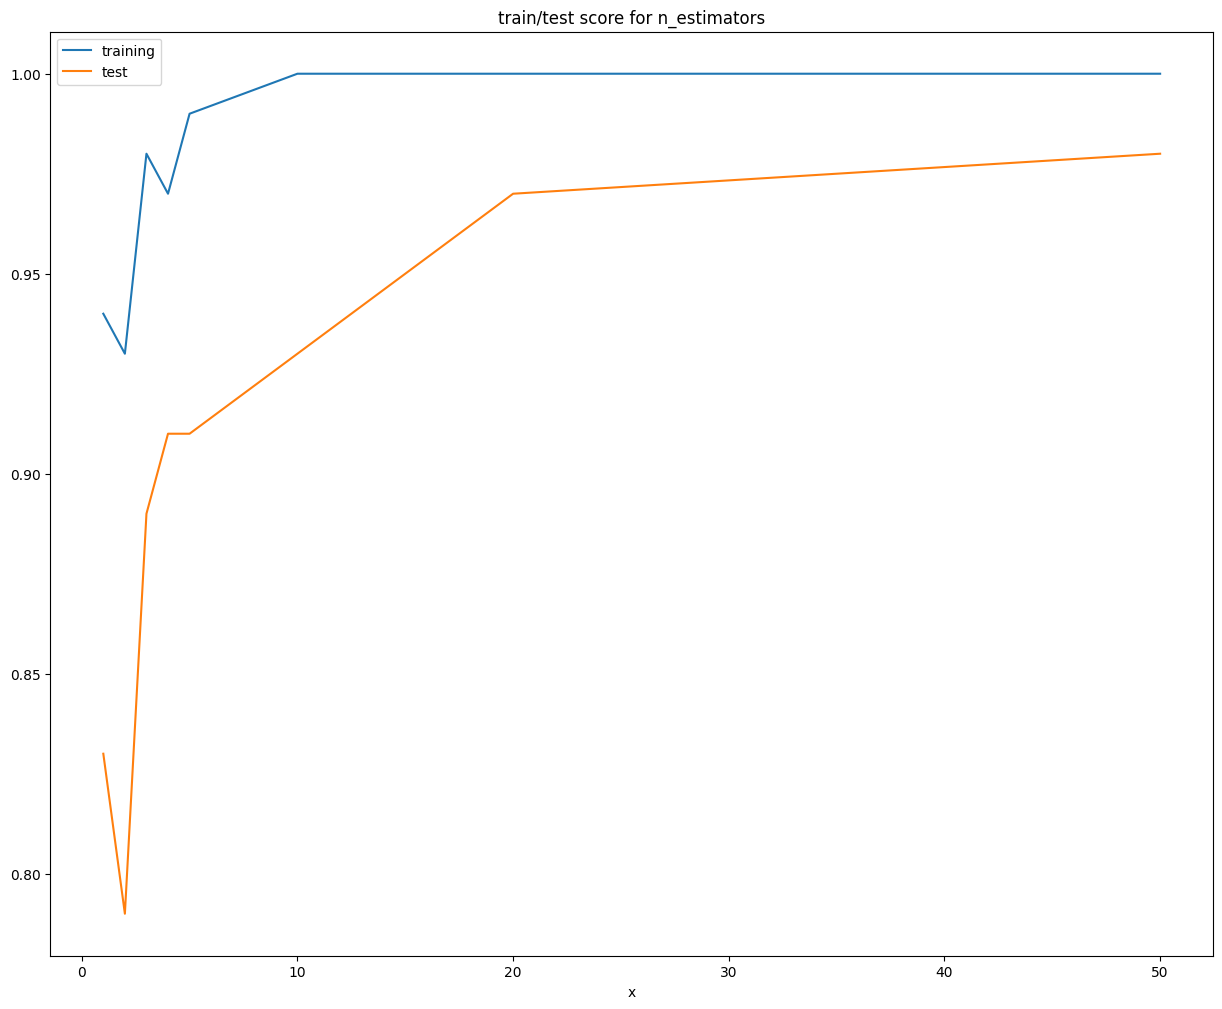

In [53]:
x = [1, 2, 3, 4, 5, 10, 20, 50]
tmp = pd.DataFrame({'x':x, 'training':train_scores, 'test':test_scores})
tmp.set_index('x', inplace=True)
tmp.plot(title='train/test score for n_estimators');

####**1. Les problèmes avec les ensembles récalcitrants**

+ ***Bonjour à nouveau - continuons notre quête de validation des modèles d'apprentissage automatique en expliquant pourquoi les approches de validation traditionnelles présentent encore des pièges.***

####**2. Validation des transitions**

+ ***La procédure de modélisation typique ressemble à ceci. Nous prenons un ensemble de données, utilisons, disons, 80 % pour la formation et les 20 % restants pour les tests. Nous avons appris à le faire il y a quelques leçons en utilisant scikit-learn. À l'aide de la fonction train_test_split(), nous divisons nos données et exécutons un classificateur de forêt aléatoire sur cette division unique pour notre modèle. Ici, nous avons sorti le MAE, et l'erreur était de 10 points-24.***

####**3. Divisions d'entraînement traditionnelles**

+ ***Si nous répétons ce processus avec une graine aléatoire différente, nous pourrions obtenir des résultats différents. Considérez les deux exemples suivants de l'ensemble de données ultime de classement de la puissance des bonbons : s1 et s2. Cet ensemble de données se compose de 85 points de données sur les caractéristiques des bonbons, et nous avons sélectionné au hasard 60 bonbons pour chaque échantillon. Seuls 39 des 60 bonbons se chevauchent entre les deux ensembles de données.***

####**4. Divisions d'entraînement traditionnelles**

+ ***De plus, le premier échantillon contient 34 bonbons au chocolat et le deuxième échantillon n'en contient que 30.***

####**5. La scission compte**

+ ***Pourquoi est-ce important? Eh bien, nous avons déjà vu que la sélection de 60 bonbons pour un échantillon peut être très variable. Si nous divisons l'ensemble de données de bonbons en 60 bonbons pour la formation et 25 bonbons pour les tests, et construisons exactement le même modèle d'apprentissage automatique, nous obtiendrons probablement des résultats légèrement différents. Dans cet exemple seul, la deuxième précision de test est inférieure de plus de 12 %. En utilisant le premier échantillon, vous rapporteriez une erreur de 10-point-32. Le second donne une erreur de 11-point-56. Ces résultats sont bien trop différents.***

####**6. Former, valider, tester**

+ ***Même la procédure d'entraînement, de validation et de test dont nous avons parlé plus tôt n'est pas à l'abri des problèmes que nous pourrions rencontrer avec des échantillons non retenus, en particulier lorsque nous disposons de données limitées. Considérez cet exemple. Nous avons créé une division d'entraînement, de test et de validation. Nous avons ajusté un modèle de forêt aléatoire, et peut-être avons-nous même effectué des réglages ou des tests d'hyperparamètres sur divers modèles. En fin de compte, nous avons opté pour ce modèle de régresseur de forêt aléatoire. Regardez à quel point les précisions de validation et de test sont proches les unes des autres - 9-point-18 et 8-point-98. C'est génial, non ?***

####**7. Tour 2**

+ ***Exécutons à nouveau le même modèle, mais cette fois, nous l'exécuterons avec une graine aléatoire différente. Les erreurs étaient 8-point-73 et 10-point-91, ce qui est un gros problème. Cela peut se produire lors de l'utilisation de l'approche de validation traditionnelle, en particulier avec des données limitées. Nous pensons que notre modèle est validé, mais si nous modifions simplement l'échantillon que nous avons utilisé, nous obtenons des résultats radicalement différents. Ce modèle de forêt aléatoire avec seulement 25 arbres et 4 caractéristiques ne semble pas se généraliser aussi bien aux nouvelles données qu'on pourrait s'y attendre.***

####**8. Exercices d'ensemble à retenir**

+ ***Pour surmonter cette limitation des ensembles d'exclusion, nous utilisons ce qu'on appelle la validation croisée, qui est la référence en matière de validation de modèle ! Avant d'introduire complètement la validation croisée, découvrons pourquoi nous en avons besoin avec quelques exercices.***

###**EXERCICES**

####**Deux échantillons**
+ ***Après avoir construit plusieurs modèles de classification basés sur le jeu de données tic_tac_toe, vous réalisez que certains modèles ne se généralisent pas aussi bien que d'autres. Vous avez créé des fractionnements de formation et de test comme on vous l'a enseigné, vous êtes donc curieux de savoir pourquoi votre processus de validation ne fonctionne pas.***

*Après avoir essayé une formation différente, vous avez remarqué des différences de précision pour votre modèle d'apprentissage automatique. Avant d'être trop frustré par les résultats variables, vous avez décidé de voir ce qui pourrait se passer d'autre.*

####**Consignes**

+ Créez des échantillons sample1 et sample2 avec 200 observations qui pourraient servir d'ensembles de données de test possibles.
+ Utilisez l'énoncé de compréhension de la liste pour savoir combien d'observations ces échantillons ont en commun.
+ Utilisez la méthode Series.value_counts() pour imprimer les valeurs dans les deux exemples pour la colonne Class.

In [54]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [55]:
# Create two different samples of 200 observations
sample1 = tic_tac_toe.sample(200, random_state=1111)
sample2 = tic_tac_toe.sample(200, random_state=1171)

# Print the number of common observations
print(len([index for index in sample1.index if index in sample2.index]))

40


In [56]:
# Print the number of observations in the Class column for both samples
print(sample1['Class'].value_counts())

positive    134
negative     66
Name: Class, dtype: int64


In [57]:
print(sample2['Class'].value_counts())

positive    123
negative     77
Name: Class, dtype: int64


***Bien joué! Notez qu'il existe un nombre variable d'observations positives pour les deux ensembles de tests d'échantillons. Parfois, la création d'un seul échantillon de test non retenu n'est pas suffisante pour atteindre les niveaux élevés de validation de modèle que vous souhaitez. Vous devez utiliser quelque chose de plus robuste.***

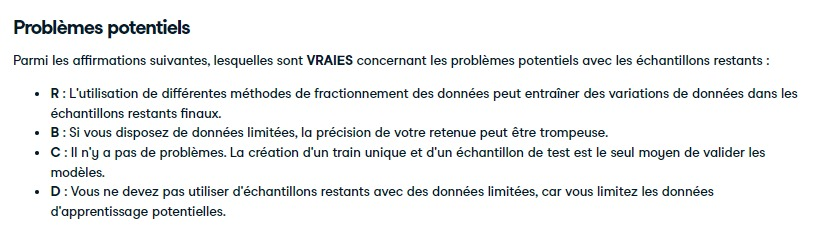
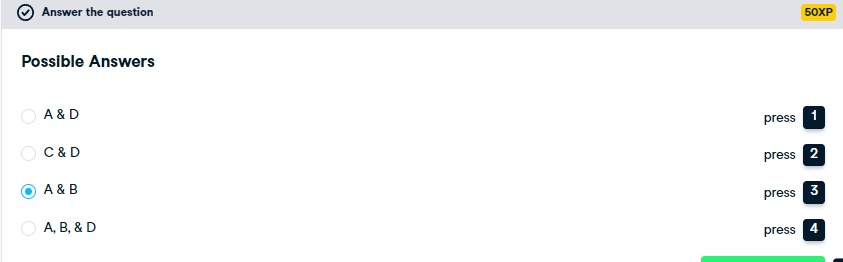

***Correct! Si nos modèles ne se généralisent pas bien ou si nous avons des données limitées, nous devons être prudents en utilisant une seule division formation/validation. Vous devriez utiliser le sujet de la leçon suivante : la validation croisée.***

####**1. Validation croisée**

+ ***Bonjour à tous, poussons la validation un peu plus loin et discutons de l'étalon-or : la validation croisée.***

####**2. Validation croisée**

+ ***Avant, nous parlions d'utiliser 80% de nos données pour la formation et 20% pour les tests. Nous sommes allés plus loin en divisant les 80 % des données d'entraînement en divisions d'entraînement et de validation. Auparavant, nous avons appris que notre métrique de précision sur cet ensemble de validation peut être trompeuse, ou si nous divisons ces données différemment, nous pourrions obtenir des résultats différents.***

####**3. Validation croisée**

+ ***Pour la validation croisée, nous n'avons pas seulement besoin d'une de ces divisions formation/validation, nous en avons besoin de plusieurs. Cette méthode nous permet d'exécuter notre modèle unique sur diverses combinaisons de formation/validation et nous donne beaucoup plus de confiance dans nos métriques finales. Pour cet exemple, nous avons une validation croisée quintuple. Chaque fois que nous exécutons le modèle, 80 % différents des données seront utilisés pour la formation et 20 % différents seront utilisés pour la validation. Et nous pouvons le faire de manière à ce que toutes les données soient utilisées dans un seul des ensembles de validation. Cela garantit que chaque point est utilisé pour la validation exactement une fois. Bien qu'il ne soit pas nécessaire d'utiliser chaque point dans un seul ensemble de validation pour la validation croisée, il est souvent recommandé de le faire. Et heureusement pour nous, ce concept de ce à quoi cela devrait ressembler, comment cela pourrait être fait, et pourquoi c'est même important est la partie la plus difficile. En fait, la mise en œuvre est très simple.***

####**4. Validation croisée KFold avec scikit-learn**

+ ***La fonction `KFold() de scikit-learn` nous offre quelques options pour diviser les données en plusieurs ensembles d'apprentissage et de validation. Nous pouvons spécifier le nombre de divisions que nous voulons ; nous pouvons spécifier si les données doivent être mélangées et pour répliquer nos résultats, nous pouvons spécifier un état aléatoire. Ici, j'ai généré deux tableaux à utiliser comme données. Le tableau $X$ se compose des nombres 0 à 39 et le tableau y se compose de 20 zéros suivis de 20 uns. Ensuite, nous créons le générateur kf, qui divisera nos données. Il utilise la fonction `KFold()` avec cinq fractionnements et aucun mélange. Pour diviser réellement nos données, nous appelons `kf.split()` sur $X$. Cela ne génère que des indices que nous pouvons utiliser. Je ne veux donc pas que vous pensiez que nous avons généré cinq ensembles de données de formation et de validation. Tout ce que nous avons fait est de créer une liste d'indices, qui peuvent être utilisés pour nos divisions.***

####**5. Accéder aux indices**

+ ***Alors, qu'y a-t-il réellement dans les fractionnements s'ils ne contiennent pas d'ensembles de données ? La variable splits contient les indices d'apprentissage et de validation pour les cinq divisions différentes de $X$. Si nous imprimons la longueur des indices, nous voyons que train_index a 32 valeurs et test_index a huit valeurs, et ceci est répété cinq fois. Si nous imprimons à quoi ressemblent réellement ces listes, nous voyons train_index a les numéros 0 à 31, et test_index a les numéros 32 à 39. L'appel de ces indices sur $X$ et $y$ nous donnera des données de formation et de validation.***

####**6. Exemple utilisant des fractionnements**

+ ***`KFold` est généralement utilisé lorsque nous voulons ajuster le même modèle en utilisant la validation croisée `KFold`. Nous créerions les séparations en utilisant `kf.split()`. Nous parcourrions ensuite les indices d'entraînement et de validation, et ajusterions le même modèle en utilisant les nouvelles données d'entraînement. Enfin, nous créons les prédictions et gardons une trace des erreurs. Pour voir les performances du modèle sur les cinq divisions que nous avons créées, nous pouvons examiner la moyenne des scores d'erreur finaux.***

#####**7. Temps de pratique**

+ ***Commençons et plions quelques données !***

###**EXERCICES**

####**KFold() de scikit-learn**
+ ***Vous venez de terminer l'exécution d'un code de collègues qui crée un modèle de forêt aléatoire et calcule une précision hors échantillon. Vous avez remarqué que le code de votre collègue n'avait pas d'état aléatoire et que les erreurs que vous avez trouvées étaient complètement différentes des erreurs signalées par votre collègue.***

+ ***Pour obtenir une meilleure estimation de la précision de ce modèle de forêt aléatoire sur de nouvelles données, vous avez décidé de générer des indices à utiliser pour `la validation croisée KFold`.***

####**Instructions**

+ Appelez la méthode KFold() pour diviser les données en utilisant cinq fractionnements, un brassage et un état aléatoire de 1111.
+ Utilisez la méthode split() de KFold sur $X$.
+ Imprimez le nombre d'indices dans les listes d'indices de train et de validation.

In [77]:
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [78]:
X = candy.drop(['competitorname', 'winpercent'], axis=1).to_numpy()
y = candy['winpercent'].to_numpy()

In [79]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


***Bon travail! Ce jeu de données comporte 85 lignes. Vous avez créé cinq divisions - chacune contenant 68 indices de formation et 17 indices de validation. Vous pouvez utiliser ces indices pour effectuer une validation croisée quintuple.***

####**Utilisation des indices KFold**

+ ***Vous avez déjà créé splits, qui contient des indices pour l'ensemble de données candy-data afin d'effectuer une validation croisée quintuple. Pour obtenir une meilleure estimation des performances du modèle de forêt aléatoire d'un collègue sur de nouvelles données, vous souhaitez exécuter ce modèle sur les cinq indices de formation et de validation différents que vous venez de créer.***

+ *Dans cet exercice, vous utiliserez ces indices pour vérifier la précision de ce modèle à l'aide des cinq divisions différentes. Une boucle for a été fournie pour faciliter ce processus.*

####**Instructions**

+ Utilisez train_index et val_index pour appeler les indices corrects de $X$ et $y$ lors de la création de données d'apprentissage et de validation.
+ Ajuster rfcà l'aide de l'ensemble de données d'entraînement
+ Utiliser rfcpour créer des prédictions pour l'ensemble de données de validation et imprimer la précision de la validation

In [80]:
# Create splits
splits = kf.split(X)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

Split accuracy: 150.99298148707666
Split accuracy: 171.22206240542593
Split accuracy: 131.72569156195593
Split accuracy: 80.61940183841385
Split accuracy: 221.63020627476214


***Bon travail! KFold() est une excellente méthode pour accéder à des index individuels lors de la validation croisée. Un inconvénient est la nécessité d'une boucle for pour parcourir les index. Dans la leçon suivante, vous examinerez une méthode automatisée de validation croisée à l'aide de sklearn.***

####**1. cross_val_score() de sklearn**

+ ***Rebonjour. Ensuite, nous allons discuter de la validation croisée dans scikit-learn.***

####**2. cross_val_score()**

+ ***Nous avons vu que `KFold()` est un excellent moyen de créer des index que nous pouvons utiliser pour la validation croisée. Si vous voulez juste passer directement à la validation croisée et que vous ne voulez pas jouer avec les indices, vous pouvez utiliser la méthode `cross_val_score()` de scikit-learn. Cette méthode nécessite quatre paramètres. Tout d'abord, nous avons l'estimateur ou le modèle spécifique que vous souhaitez utiliser. Dans cet exemple, nous avons un `RandomForestClassifier()` avec les paramètres de modèle par défaut. Ensuite, nous utilisons $X$ pour spécifier l'ensemble de données d'entraînement complet et $y$ pour spécifier les valeurs de réponse. Enfin, le paramètre cv permet de spécifier le nombre de splits (ou folds) de validation croisée. Dans cet exemple, nous avons défini le paramètre cv sur 5, ce qui nous permet d'effectuer une validation croisée quintuple. Par défaut, `cross_val_score()` utilisera une fonction de notation par défaut pour le modèle que vous avez spécifié. Par exemple, si vous avez un RandomForestClassifer comme estimateur, la fonction de score par défaut est la précision globale moyenne. Pour la plupart des modèles de régression, il renverra la valeur R au carré($R^2$).***

####**3. Utiliser la notation et make_scorer**

+ ***Si vous souhaitez utiliser une fonction de notation différente, vous pouvez créer un marqueur en utilisant la méthode `make_scorer()` et en spécifiant la métrique de notation que vous souhaitez utiliser. Ici, nous créons un marqueur pour la fonction `mean_absolute_error()` en appelant `make_scorer()` sur la méthode de scikit-learn pour calculer l'erreur absolue moyenne. Enfin, nous définissons le paramètre de score égal au mae_scorer nouvellement créé à l'intérieur de la fonction.***

####**4. Exemple complet**

+ ***Passons en revue un exemple complet d'utilisation de `cross_val_score()` de scikit-learn pour un modèle de régression. La première étape consiste à charger toutes les méthodes nécessaires. Nous chargeons le modèle, `cross_val_score()`, et les méthodes `make_scorer()` et `mean_squared_error()`. Ensuite, nous spécifions le modèle de régression que nous voulons utiliser, avec les paramètres spécifiques, ainsi que la création du scorer qui doit être utilisé lors de l'exécution du modèle de régression. Enfin, nous appelons `cross_val_score()` sur l'estimateur, rfr, l'ensemble de données $X$, les valeurs de réponse $y$ et définissons un score égal au scoreur que nous avons généré. Dans cet exemple, nous avons défini cv sur 5 pour effectuer une validation croisée quintuple.***

####**5. Accéder aux résultats**

+ ***Regardons les résultats. Remarquez à quel point les erreurs quadratiques moyennes sont variées. Le plus bas était de près de 86, tandis que le plus élevé était bien supérieur à 200. Si nous avons choisi une répartition 80/20 sur les données au hasard, nous avons peut-être signalé une erreur aussi faible que 86 ou une erreur aussi élevée que 223. Lorsque nous utiliser la validation croisée, nous rapportons généralement la moyenne des erreurs. Dans ce cas, il était de 150. Il s'agit d'une estimation beaucoup plus réaliste de la précision hors échantillon que nous pouvons nous attendre à voir sur de nouvelles données. Quatre-vingt-six était probablement une erreur bien trop faible, tandis que 223 était bien trop élevée. Enfin, nous pouvons examiner l'écart type pour voir à quel point les cinq résultats étaient variés. Plus l'écart type est petit, plus vos 5 moyennes sont serrées. Cela indique que la précision réelle des nouvelles données correspondra probablement assez bien à la moyenne du score de validation croisée.***

####**6. Entraînons-nous !**

+ ***Utilisons maintenant `cross_val_score()` pour effectuer une validation croisée.***

###**EXERCICES**

####**les méthodes de scikit-learn**

+ ***Vous avez décidé de créer un modèle de régression pour prédire le nombre de nouveaux employés que votre entreprise embauchera avec succès le mois prochain. Vous ouvrez un nouveau script Python pour commencer, mais vous réalisez rapidement sklearn contient de nombreux modules différents. Assurons-nous que vous comprenez les noms des modules, les méthodes et quel module contient quelle méthode.***

+ ***Suivez les instructions ci-dessous pour charger toutes les méthodes nécessaires pour effectuer la validation croisée à l'aide de sklearn. Vous utiliserez les modules :***

  + *metrics*
  + *model_selection*
  + *ensemble*

####**Instructions**

+ Charger la méthode de calcul des scores de validation croisée.
+ Chargez la méthode de régression de forêt aléatoire.
+ Chargez la métrique d'erreur quadratique moyenne.
+ Chargez la méthode de création d'un marqueur à utiliser avec la validation croisée.

In [82]:
# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import make_scorer, mean_squared_error

***Bien joué! Il est facile de voir comment toutes les méthodes peuvent être mélangées, mais il est important de connaître les noms des méthodes dont vous avez besoin. Vous pouvez toujours consulter [la documentation scikit-learn](https://scikit-learn.org/stable/index.html) si vous avez besoin d'aide***

####**Implémenter cross_val_score()**

+ ***Votre entreprise a créé plusieurs nouveaux bonbons à vendre, mais elle ne sait pas si elle doit les commercialiser tous les cinq. Pour prédire la popularité de ces nouveaux bonbons, on vous a demandé de créer un modèle de régression à l'aide de l'ensemble de données sur les bonbons. N'oubliez pas que la valeur de réponse est un pourcentage de victoire face à face contre d'autres bonbons.***

+ *Avant de commencer à essayer différents modèles de régression, vous avez décidé d'exécuter une validation croisée sur un modèle de forêt aléatoire simple pour obtenir une erreur de base à comparer avec les résultats futurs.*

####**Instructions**

+ Remplissez cross_val_score().
+ À utiliser X_train pour les données d'entraînement et y_train pour la réponse.
+ Utiliser rfc comme modèle, validation croisée 10 fois et msepour la fonction de notation.
+ Imprimer la moyenne des résultats cv.

In [83]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring=mse)

# Print the mean error
print(cv.mean())

131.30323056938693


***Bon! Vous avez maintenant un score de base sur lequel vous baser. Si vous décidez de construire des modèles supplémentaires ou d'essayer de nouvelles techniques, vous devriez essayer d'obtenir une erreur inférieure à 155,56. Des erreurs plus faibles indiquent que vos prévisions de popularité s'améliorent.***

####**1. Leave-one-out-cross-validation (LOOCV)**

+ ***Bienvenue à nouveau - dans cette leçon, nous faisons un pas de plus vers la validation croisée KFold et discutons de la validation croisée leave-one-out.***

####**2. LOOCV**

+ ***Tout est dans le nom. Dans la validation croisée leave-one-out, nous allons implémenter la validation croisée KFold, où k est égal à n, le nombre d'observations dans les données. Cela signifie que chaque point sera utilisé dans un ensemble de validation, complètement par lui-même. Pour le premier modèle, nous utiliserons toutes les données pour l'entraînement, à l'exception du premier point, qui servira à la validation. Dans le modèle 2, nous ne laissons que le deuxième point de données, dans le modèle trois, le troisième point de données, et ainsi de suite. Nous créons n modèles, pour n-observations dans les données. Il peut sembler étrange d'utiliser un seul point comme ensemble de validation complet, mais rappelez-vous ce que vous ferez après la fin de la validation croisée sans un seul. Vous présenterez l'erreur moyenne des n exécutions du modèle.***

####**3. Quand utiliser LOOCV ?**

+ ***Vous pouvez utiliser cette technique lorsque vos données sont limitées et que vous souhaitez utiliser autant de données d'apprentissage que possible lors de l'ajustement du modèle. Cette méthode est également utilisée car elle fournit la meilleure estimation d'erreur possible pour un seul nouveau point. Considérez que vous venez d'exécuter n-modèles, où chaque fois que vous avez omis un seul point. Si vous recevez un seul nouveau point et que vous devez estimer votre erreur, la validation croisée sans un seul est la bonne méthode à utiliser. Malheureusement, cette méthode est très coûteuse en temps de calcul. Vous devez l'utiliser avec prudence si vous avez beaucoup de données ou si vous prévoyez de tester de nombreux ensembles de paramètres différents. La meilleure façon de juger si cette méthode est même possible est d'exécuter la validation croisée KFold avec un grand K, peut-être 25 ou 50,***

####**4. Exemple de LOOCV**

+ ***L'implémentation de la validation croisée leave-one-out peut être effectuée à l'aide de cross_val_score(). Il vous suffit de définir le paramètre cv égal au nombre d'observations dans votre jeu de données. Nous pouvons trouver le nombre d'observations en regardant la forme de l'ensemble de données X. Le résultat de l'exécution de la validation croisée leave-one-out sera une liste d'erreurs qui représentent l'erreur d'exécuter un modèle et de laisser un seul point de côté. La liste aura n valeurs, où n est le nombre d'observations. Enfin, nous imprimons la moyenne et l'utilisons comme métrique d'erreur globale.***

####**5. Pratiquons**

+ ***Commençons à pratiquer la validation croisée leave-one-out.***



####**Quand utiliser LOOCV**

+ ***Parmi les raisons suivantes, quelles sont les raisons pour lesquelles vous ne pouvez PAS exécuter LOOCV sur l' Xensemble de données fourni ? Les données $X$ ont été chargées pour que vous puissiez les explorer comme bon vous semble.***

  + *R : L' Xensemble de données contient 122 624 points de données, ce qui peut être coûteux et lent en termes de calcul.*
  + *B : Vous ne pouvez pas exécuter LOOCV sur des problèmes de classification.*
  + *C : Vous souhaitez tester différentes valeurs pour 15 paramètres différents*

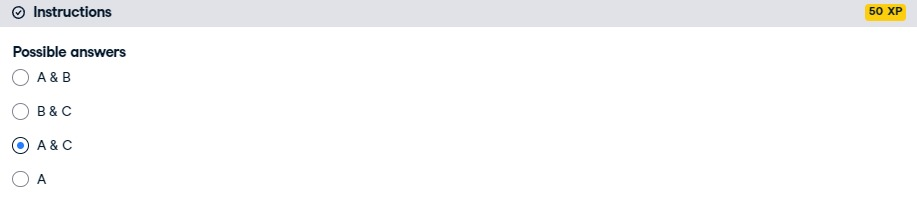

***Bien joué! Ces nombreuses observations ralentiront certainement les choses et pourraient être coûteuses en calcul. Si vous n'avez pas le temps d'attendre pendant que votre ordinateur parcourt 1 000 modèles, vous pouvez utiliser la validation croisée 5 ou 10 fois.***

####**Validation croisée Leave-one-out**

+ ***Supposons que votre bonbon préféré ne figure pas dans l'ensemble de données sur les bonbons et que vous vous intéressiez à la popularité de ce bonbon. L'utilisation de la validation croisée quintuple entraînera uniquement 80 % des données à la fois. Cependant , l'ensemble de données sur les bonbons ne compte que 85 lignes, et omettre 20 % des données pourrait entraver notre modèle. Cependant, l'utilisation de la validation croisée leave-one-out nous permet de tirer le meilleur parti de notre ensemble de données limité et vous donnera la meilleure estimation de la popularité de votre bonbon préféré !***

+ *Dans cet exercice, vous utiliserez cross_val_score() pour effectuer LOOCV.*

####**Instructions**

+ Créez un marqueur en utilisant mean_absolute_error for cross_val_score()to use.
+ Remplissez cross_val_score() afin que le modèle rfr, le nouvellement défini mae_scoreret LOOCV soient utilisés.
+ Imprimer la moyenne et l'écart type de scores l'utilisation numpy(chargé en tant que np).

In [84]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X=X, y=y, cv=y.shape[0], scoring=mae_scorer)

In [85]:
# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.52044832324183.
The standard deviation of the errors is: 7.349020637882744.


***Très bien! Vous avez parcouru un long chemin avec les techniques de validation de modèles. Le dernier chapitre résumera la validation du modèle en expliquant comment sélectionner le meilleur modèle et en donnant une introduction au réglage des paramètres.***

####**1. Introduction au réglage des hyperparamètres**

+ ***Bonjour à nouveau - Dans cette leçon, nous allons commencer à appliquer les techniques de validation de modèle que nous avons pratiquées lors de l'introduction du réglage des hyperparamètres.***

####**2. Paramètres du modèle**

+ ***Pour commencer, examinons d'abord ce que sont les paramètres de modèle, car les paramètres de modèle et les hyperparamètres de modèle sont assez différents. Les paramètres du modèle sont créés à la suite de l'ajustement d'un modèle et sont estimés par les données d'entrée. Ils sont utilisés pour faire des prédictions sur de nouvelles données et ne sont pas définis manuellement par le modélisateur.***

####**3. Paramètres de régression linéaire**

+ **Par exemple, dans un modèle linéaire, les coefficients et l'ordonnée à l'origine sont considérés comme des paramètres de modèle. Nous pouvons imprimer les paramètres d'un modèle linéaire en utilisant `lr-dot-coef_ et lr-dot-intercept_`. Notez que ces paramètres ne sont créés qu'après l'ajustement du modèle.***

####**4. Paramètres de régression linéaire**

+ ***Si nous n'appelions pas .fit, les coefficients et l'ordonnée à l'origine n'existeraient pas pour l'objet lr.***

####**5. Hyperparamètres du modèle**

+ ***Donc, si les paramètres du modèle sont le résultat de la formation d'un modèle, alors que sont les hyperparamètres ? `Les hyperparamètres sont les valeurs qui sont définies avant que l'apprentissage ne se produise`. Ainsi, chaque fois que nous nous référons à un paramètre comme étant défini manuellement, nous nous référons à des hyperparamètres. Nous avons déjà travaillé avec certains hyperparamètres pour les modèles de forêts aléatoires de scikit-learn, tels que `n_estimators et max_depth`. Passons en revue quelques-uns des hyperparamètres de base de ces modèles.***

####**6. Hyperparamètres forestiers aléatoires**

+ ***Le tableau ci-dessus ne contient que quatre des quelque 15 hyperparamètres possibles, et nous avons déjà discuté des trois premiers : n_estimators, max_depth et max_features au cours de ce cours. J'ajoute min_samples_split à notre liste, qui est le nombre minimum d'échantillons requis pour faire une scission à la fin d'une feuille. Si une feuille d'un arbre de décision contient quatre observations, min_samples_split doit être égal ou supérieur à 4 pour que cette feuille soit divisée en plusieurs feuilles. Et maintenant ? S'il s'agit d'hyperparamètres, comment les régler ?***

####**7. Qu'est-ce que le réglage des hyperparamètres ?**

+ ***Tout au long de ce cours, nous avons fait allusion à divers aspects du réglage des hyperparamètres. Nous avons utilisé divers hyperparamètres et modifié les valeurs de ces hyperparamètres pour les adapter à notre modèle ou à nos données spécifiques. Le réglage des hyperparamètres consiste à sélectionner les hyperparamètres à tester, puis à exécuter un type spécifique de modèle avec différentes valeurs pour ces hyperparamètres. Pour chaque exécution du modèle, nous gardons une trace de la performance du modèle pour une métrique de précision spécifiée, ainsi que des hyperparamètres utilisés.***

####**8. Spécification des plages**

+ ***L'une des parties les plus difficiles de ce processus consiste à sélectionner les bons hyperparamètres à régler et à spécifier les plages de valeurs appropriées pour chaque hyperparamètre. Par exemple, considérez les trois plages de valeurs spécifiées dans l'exemple ci-dessus. Lorsque nous exécutons le réglage des hyperparamètres, nous exécutons notre modèle de forêt aléatoire à des valeurs différentes des plages spécifiées. Nous pourrions sélectionner une profondeur maximale aléatoire, un échantillon minimal pour créer des fractionnements de 8 et un nombre maximal de caractéristiques de 4. Nous avons utilisé la fonction `random-dot-choice()` pour sélectionner au hasard dans la liste des profondeurs. Pour vérifier quels paramètres ont été utilisés à tout moment, vous pouvez utiliser la méthode `get_params()` sur votre modèle.***

####**9. Trop d'hyperparamètres !**

+ ***Si vous consultez le contenu de `get_params()`, vous pourriez vous sentir dépassé par le nombre d'options disponibles. Pour ce modèle, il existe 16 hyperparamètres différents. En pratique, cependant, seule une poignée de ces hyperparamètres seront réglés en même temps. En régler trop peut prendre une éternité à s'entraîner et peut rendre difficile la lecture de la sortie.***

####**10. Directives générales**

+ ***Il est préférable de commencer par les bases et d'ajuster les hyperparamètres que vous comprenez. Lisez la documentation pour ceux que vous ne connaissez pas et testez les valeurs que vous avez vues dans d'autres modèles. Au fur et à mesure que vous pratiquerez cette technique, vous deviendrez plus à l'aise avec le processus.***

####**11. Entraînons-nous !**

+ ***Travaillons sur les étapes de base pour le réglage des hyperparamètres.***



####**Création d'hyperparamètres**
+ ***Pour un devoir scolaire, votre professeur a demandé à votre classe de créer un modèle de forêt aléatoire pour prédire la note moyenne au test de l'examen final.***

+ ***Après avoir développé un modèle de forêt aléatoire initial, vous n'êtes pas satisfait de la précision globale. Vous vous rendez compte qu'il y a trop d'hyperparamètres parmi lesquels choisir, et chacun a beaucoup de valeurs possibles. Vous avez décidé de dresser une liste des plages possibles pour les hyperparamètres que vous pourriez utiliser dans votre prochain modèle.***

+ ***Votre professeur a fourni des données anonymisées pour les dix derniers quiz afin qu'elles servent de données d'entraînement. Il y a 30 élèves dans votre classe.***

####**Consignes**

+ Imprimez .get_params() dans la console pour passer en revue les paramètres possibles du modèle que vous pouvez régler.
+ Créez une liste de profondeur maximale [4, 8, 12]et une liste d'échantillons minimum [2, 5, 10]qui spécifient les valeurs possibles pour chaque hyperparamètre.
+ Créez une liste finale à utiliser pour le maximum de fonctionnalités.
  + Utilisez les valeurs 4 jusqu'au nombre maximum de fonctionnalités possibles (10), par 2.

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators='warn', max_features='auto', random_state=1111)

In [87]:
# Review the parameters of rfr
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


In [88]:
# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features
max_features = [4, 6, 8, 10]

***Bon travail! Le réglage des hyperparamètres nécessite de sélectionner les paramètres à régler, ainsi que les valeurs possibles auxquelles ces paramètres peuvent être définis.***

####**Exécution d'un modèle à l'aide de plages**
+ ***Vous venez de terminer la création d'une liste d'hyperparamètres et de plages à utiliser lors du réglage d'un modèle prédictif pour une affectation. Vous avez utilisé max_depth, min_samples_split et max_features comme noms de variables de plage.***

####**Instructions**

+ Sélectionnez au hasard un max_depth, min_samples_splitet en max_features utilisant vos variables de plage.
+ Imprimez tous les paramètres pour rfrvoir quelles valeurs ont été sélectionnées au hasard.

In [89]:
import random
from sklearn.ensemble import RandomForestRegressor

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=
    random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


***Bon travail! Notez que min_samples_splita été défini de manière aléatoire sur 2. Puisque vous avez spécifié un état aléatoire, min_samples_splitsera toujours défini sur 2 si vous n'exécutez ce modèle qu'une seule fois.***

####**1. RandomizedSearchCV**

+ ***Maintenant que nous avons discuté des bases du réglage des hyperparamètres, combinons la validation du modèle avec le réglage pour commencer à créer les modèles validés les plus précis possibles.***

####**2. Hyperparamètres de recherche de grille**

+ ***Imaginez si nous n'avions le choix qu'entre deux paramètres, le nombre d'arbres et la profondeur maximale. Si nous avions cinq options pour le nombre d'arbres et quatre options pour la profondeur maximale, cela créerait 20 combinaisons possibles de ces paramètres. Notez qu'ils forment une grille de paramètres possibles. Nous pourrions effectuer une recherche complète sur la grille et exécuter notre modèle de forêt aléatoire en utilisant chaque combinaison unique des deux hyperparamètres.***

####**3. Recherche de grille suite**

+ ***Il y a un avantage principal pour la recherche par grille, c'est que chaque combinaison possible de valeurs sera testée. Cependant, il y a un inconvénient majeur : tout paramètre supplémentaire ajouté pour les tests augmentera le temps de formation de manière exponentielle. Par conséquent, la recherche par grille n'est possible qu'avec un nombre limité de paramètres et un nombre limité de plages.***

####**4. De meilleures méthodes**

+ ***Il existe deux alternatives étonnantes à l'utilisation de la recherche par grille, qui ont toutes deux leurs avantages par rapport à la recherche par grille. La recherche aléatoire, qui consiste à sélectionner au hasard toutes les valeurs d'hyperparamètres dans la liste des plages possibles, et l'optimisation bayésienne, qui utilise les résultats antérieurs de chaque test pour mettre à jour les hyperparamètres pour la prochaine exécution. Les approches bayésiennes sortent du cadre de ce cours, nous nous concentrerons donc sur les méthodes de recherche aléatoire.***

####**5. Recherche aléatoire**

+ ***Pour implémenter une recherche aléatoire, nous pouvons utiliser la méthode de scikit-learn, `RandomizedSearchCV()`. Cette méthode sélectionnera de manière aléatoire des hyperparamètres pour chaque exécution de modèle en fonction de l'espace d'hyperparamètres défini par l'utilisateur. `RandomizedSearchCV()` nécessite un dictionnaire d'hyperparamètres et leurs valeurs possibles. Ici, nous avons spécifié quatre profondeurs maximales, neuf fonctionnalités maximales et neuf options min_samples_split. L'utilisation d'une recherche de grille avec ces paramètres possibles nécessiterait 324 exécutions totales du modèle, car 4 fois 9 fois 9 est 324. Cependant, en utilisant une recherche aléatoire, nous pouvons obtenir des résultats similaires uniquement en utilisant 30 ou 40 exécutions.***

####**6. Paramètres de recherche aléatoires**

+ ***Pour utiliser cette méthode, nous devons spécifier quelques autres paramètres. Le paramètre `n_iter` spécifie le nombre de modèles à exécuter. L'estimateur nous permet de définir le modèle de base, tel qu'un modèle de régression de forêt aléatoire, et la notation nous permet de spécifier une fonction de notation.***

####**7. Définition des paramètres RandomizedSearchCV**

+ ***Outre la configuration des distributions de paramètres, nous devons créer un modèle et la fonction de notation à utiliser. L'estimateur spécifié ici utilise un modèle `RandomForestRegression()`, avec 20 arbres. Nous avons également spécifié l'erreur absolue moyenne comme étant la fonction de notation.***

####**8. RandomizedSearchCV mis en œuvre**

+ ***Implémentons enfin la méthode `RandomizedSearchCV`. Nous utilisons notre modèle, rfr, la distribution des paramètres, spécifions d'utiliser 40 ensembles de paramètres et définissons la valeur cv sur 5. Ah ! J'espère donc que le "CV" à la fin de cette méthode nous aide à comprendre pourquoi nous discutons même du réglage des hyperparamètres dans un cours sur la validation du modèle ! Les techniques de validation croisée dont nous avons discuté seront utilisées avec une recherche aléatoire pour nous aider à sélectionner le meilleur modèle pour nos données. Après tout, si nous testons 40 jeux de paramètres différents, comment déterminer lequel est le meilleur ? Et comment comparer convenablement leurs résultats ? Nous devons utiliser les techniques que nous avons apprises jusqu'à présent dans ce cours.***

####**9. RandomizedSearchCV mis en œuvre**

+ ***Après avoir utilisé RandomizedSearchCV, nous devrions avoir un modèle validé qui a une meilleure précision que l'utilisation de l'implémentation de base de ce modèle. Pour terminer la recherche aléatoire, nous utilisons la méthode `dot-fit()`, comme tout autre modèle scikit-learn.***

####**10. Explorons quelques exemples !**

+ ***Nous allons économiser l'exploration de la sortie de la méthode `RandomizedSearchCV()` pour la prochaine leçon. Pour l'instant, passons en revue quelques exemples.***

###**EXERCICES**

####**Préparation pour RandomizedSearch**


+ ***Le semestre dernier, votre professeur a mis votre classe au défi de créer un modèle prédictif pour prédire les résultats des examens finaux. Vous avez essayé d'exécuter quelques modèles différents en sélectionnant au hasard des hyperparamètres. Cependant, l'exécution de chaque modèle vous obligeait à le coder individuellement.***

+ ***Après avoir pris connaissance de RandomizedSearchCV(), vous revoyez le défi de votre professeur pour créer le meilleur modèle. Dans cet exercice, vous allez préparer les trois entrées nécessaires pour effectuer une recherche aléatoire.***

####**Instructions**

+ Finalisez le dictionnaire de paramètres en ajoutant une liste pour le paramètre max_depth avec les options 2, 4, 6 et 8.
+ Créez un modèle de régression forestière aléatoire avec dix arbres et un random_statede 1111.
+ Créez un marqueur d'erreur quadratique moyenne à utiliser.

In [92]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

rfc = RandomForestClassifier(max_features='sqrt')

param_dist = {
    'max_depth': [2, 4, 8, 12],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators':[10, 20, 30]
}

rs = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=10,
                        cv=5, scoring=None, random_state=1111)

In [96]:
rs.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 8, 12],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [10, 20, 30]},
                   random_state=1111)

In [97]:
rs.best_params_

{'n_estimators': 20, 'min_samples_split': 2, 'max_depth': 8}

***Bien joué! Pour utiliser `RandomizedSearchCV()`, vous avez besoin d'un dictionnaire de distribution, d'un estimateur et d'un scoreur. Une fois que vous les avez, vous pouvez lancer une recherche aléatoire pour trouver les meilleurs paramètres pour votre modèle.***


####**Mise en œuvre de RandomizedSearchCV**

+ ***Vous espérez que l'utilisation d'un algorithme de recherche aléatoire vous aidera à améliorer les prédictions pour un devoir de classe. Votre professeur a mis votre classe au défi de prédire la note moyenne globale de l'examen final.***

+ ***En vue d'effectuer une recherche aléatoire, vous avez créé :***

  + `param_dist: les distributions d'hyperparamètres`
  + `rfr: un modèle de régression forestière aléatoire`
  + `scorer: une méthode de notation à utiliser`

####**Instructions**

+ Charger la méthode pour effectuer une recherche aléatoire dans sklearn.
+ Effectuez une recherche aléatoire en renseignant les paramètres : estimator, param_distributions, et scoring.
+ Utilisez la validation croisée 5 fois pour cette recherche aléatoire.

In [91]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)

***Bon! Bien que cela nécessite de nombreuses étapes, le réglage des hyperparamètres avec recherche aléatoire en vaut la peine et peut améliorer la précision de vos modèles. De plus, vous utilisez déjà la validation croisée pour valider votre meilleur modèle.***

####**1. Sélection de votre modèle final**

+ ***Dans cette leçon, nous allons explorer la sortie d'une implémentation de recherche aléatoire, puis sélectionner et réutiliser notre modèle final.***

####**2. Sortie de recherche aléatoire**

+ ***Pour commencer, nous supposerons que la variable rs est une implémentation de `RandomizedSearchCV()` qui a déjà été adaptée aux données. Explorons quelques-uns des attributs clés de rs. Bien sûr, les premiers attributs que nous, les castors impatients, devons vérifier se concentrent sur le meilleur modèle. Et ainsi, les attributs ont été ainsi nommés `best_score_, best_params_ et best_estimator_`. Ces attributs fournissent les résultats du meilleur modèle trouvé dans la recherche aléatoire, et vous utiliserez souvent ces attributs.***

####**3. Autres attributs**

+ ***Bien sûr, il y a d'autres attributs à explorer. Le plus utile sera peut-être `rs-dot-cv_results_`, qui contient un dictionnaire complet des résultats de la validation croisée. Ce dictionnaire comprend des clés telles que `"mean_test_scores"`, qui donne le score moyen du test de validation croisée pour chaque exécution. Le dictionnaire contient également la clé "params", qui contient tous les paramètres sélectionnés pour chaque exécution du modèle.***

####**4. Utilisation de .cv_results_**

+ ***Nous pouvons utiliser ces attributs pour créer des visuels de la sortie ou faire des déductions sur les hyperparamètres qui ont le plus grand impact sur le modèle. Par exemple, examinons les scores moyens aux tests regroupés par la profondeur maximale du modèle. Ici, nous avons saisi la profondeur maximale de chacun des 10 modèles, ainsi que le score moyen au test. Nous avons ensuite créé un pandas DataFrame et regroupé les scores par profondeur maximale. Si nous regardons la sortie, une profondeur maximale de 2, 4 et même 6 a produit des scores vraiment bas. Cependant, une profondeur maximale de 8 et 10 atteint presque 90% de précision.***

####**5. Autres attributs suite**

+ ***Il existe une tonne de façons d'utiliser la sortie `cv_results_` pour visualiser l'effet de chaque paramètre. Dans le cas que nous venons d'explorer, il est probablement préférable d'utiliser une profondeur maximale plus grande lors de l'exécution de vos modèles. Ces résultats pourraient vous inciter à relancer la recherche aléatoire avec un espace d'hyperparamètres légèrement différent. Pour le moment, nous voulons simplement sélectionner le meilleur modèle parmi notre recherche aléatoire.***

####**6. Sélection du meilleur modèle**

+ ***Cependant, vous effectuez un réglage des hyperparamètres ; à la fin, vous devrez sélectionner un modèle final. Cela peut être le modèle avec la meilleure précision ou le modèle avec la plus grande précision ou même le rappel. Pour l'instant, supposons que nous recherchions la meilleure erreur quadratique moyenne. Le modèle avec l'erreur la plus faible de la validation croisée est notre supposition pour le modèle qui fonctionnera le mieux sur les données futures. L'attribut `best_estimator_` contient le modèle qui s'est le mieux comporté lors de la validation croisée.***

####**7. Comparer les types de modèles**

+ ***Soit dit en passant, si vous avez construit différents types de modèles, par exemple une forêt aléatoire et un modèle d'amplification de gradient, vous pouvez tester la précision de vos modèles finaux sur l'ensemble de test que vous avez utilisé. Cela donne une estimation impartiale et peut vous aider à prendre votre décision globale finale. Dans le cas ci-dessus, vous sélectionneriez le modèle d'amplification du gradient comme modèle final car il avait une erreur quadratique moyenne inférieure sur les données de test.***

####**8. Utiliser .best_estimator_**

+ ***Utilisons `best_estimator_` d'un modèle de forêt aléatoire. Vous pouvez utiliser la méthode `predict()` sur cet estimateur avec de nouvelles données comme n'importe quel autre modèle scikit-learn. Vous pouvez vérifier tous les paramètres qui ont été utilisés en appelant la méthode `get_params()` ou vous pouvez enregistrer l'estimateur sous forme de fichier pickle à l'aide du module joblib pour le réutiliser ultérieurement. Cela vous permettra de charger votre modèle ultérieurement ou de partager votre modèle avec un collègue.***

####**9. Entraînons-nous !**

+ ***Travaillons à travers quelques exemples.***

###**EXERCICES**

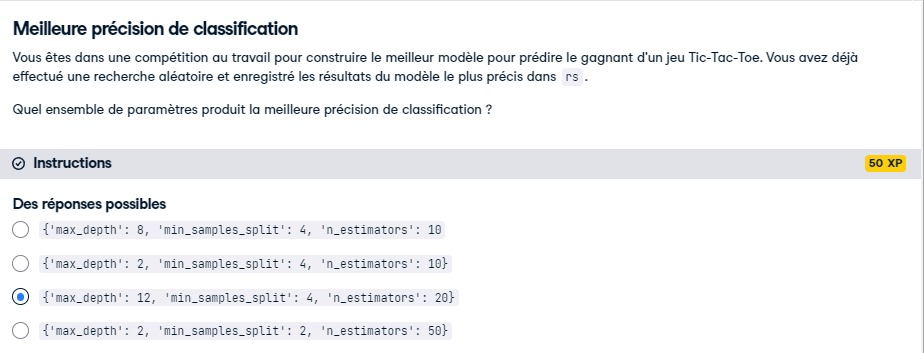

***Parfait! Ces paramètres produisent la meilleure précision de test. Bon travail! N'oubliez pas que pour réutiliser ce modèle, vous pouvez utiliser `rs.best_estimator_`.***

####**Sélection du meilleur modèle de précision**

+ ***Votre patron a proposé de vous payer pour voir trois matchs de sport cette année. Sur les 41 matchs à domicile joués par votre équipe préférée, vous voulez vous assurer d'assister à trois matchs à domicile qu'elle gagnera à coup sûr . Vous construisez un modèle pour décider quels matchs votre équipe gagnera.***

+ ***Pour ce faire, vous allez construire un algorithme de recherche aléatoire et vous concentrer sur la précision du modèle (pour vous assurer que votre équipe gagne). Vous voulez également garder une trace de votre meilleur modèle et de vos meilleurs paramètres, afin de pouvoir les réutiliser l'année prochaine (si le modèle fonctionne bien, bien sûr). Vous avez déjà décidé d'utiliser le modèle de classification aléatoire des forêts rfcet généré une distribution de paramètres `param_dist`.***

####**Instructions**

+ Créez un marqueur de précision precisionà l'aide de make_scorer(<scoring_function>).
+ Complétez la méthode de recherche aléatoire en utilisant `rfc et param_dist`.
+ Utilisez `rs.cv_results_` pour imprimer les résultats moyens des tests.
+ Imprimez le meilleur score global.

In [98]:
sports = pd.read_csv('sports.csv')
sports.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,win
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [99]:
X = sports.drop('win', axis=1)
y = sports['win']

In [100]:
param_dist = {
    'max_depth': range(2, 12, 2),
    'min_samples_split': range(2, 12, 2),
    'n_estimators': [10, 25, 50]
}

In [101]:
from sklearn.metrics import precision_score, make_scorer
rfc = RandomForestClassifier()

# Create a precision scorer
precision = make_scorer(precision_score)
# Finalize the random search
rs = RandomizedSearchCV(
  estimator=rfc, param_distributions=param_dist,
  scoring = precision,
  cv=5, n_iter=10, random_state=1111)
rs.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(2, 12, 2),
                                        'min_samples_split': range(2, 12, 2),
                                        'n_estimators': [10, 25, 50]},
                   random_state=1111, scoring=make_scorer(precision_score))

In [102]:
# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))

The accuracy for each run was: [0.89121953 0.73824138 0.6725541  0.89963437 0.87018544 0.90330502
 0.6698944  0.80530187 0.88995038 0.91240638].
The best accuracy for a single model was: 0.9124063764818386


***Wow - La précision de votre modèle était de 93 % ! Le meilleur modèle prédit avec précision un jeu gagnant 93 % du temps. Si vous regardez les résultats moyens des tests, vous pouvez dire que certains des autres ensembles de paramètres ont vraiment mal fonctionné. De plus, puisque vous avez utilisé la validation croisée, vous pouvez être confiant dans vos prédictions. Bien joué!***